In [1]:
%config Completer.use_jedi = False

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from dotenv import load_dotenv
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.fundamentaldata import FundamentalData
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pprint import pprint
import pickle

In [3]:
plt.rcParams["figure.figsize"] = (14,7)

In [4]:
# plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [5]:
pwd

'/Users/tarekatwan/Documents/Coding/Repos/stock_timeseries_forecasting'

# 1. Data Collection

# AlphaVantage API and Datasets

In [6]:
import os
load_dotenv('ts/keys.env')
alpha = os.environ.get('alpha')

In [7]:
ts = TimeSeries(key=alpha, output_format='pandas')

In [8]:
fd = FundamentalData(key=alpha, output_format='pandas')

In [9]:
ti = TechIndicators(key=alpha, output_format='pandas')

In [10]:
sp = SectorPerformances(key=alpha, output_format='pandas')

## Get Sector Performnace Data

In [24]:
from tqdm import tqdm
import time

def get_sp_data():
    data, metadata = sp.get_sector()
        
    return data

## Get Fundamentals Data

In [54]:
from tqdm import tqdm
import time

def get_fd_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = fd.get_income_statement_annual(symbol=symbol)
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Technical Indicators Data

In [16]:
from tqdm import tqdm
import time

def get_ti_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = ti.get_rsi(symbol=symbol)
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Daily Stock Data

In [18]:
from tqdm import tqdm
import time

def get_price_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Company Overview Data

In [204]:
from tqdm import tqdm
import time
def get_fundamental_overview(symbols):
    overview = []
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        f = fd.get_company_overview(symbol)
        overview.append(f[0])
  
    fd_cols = ['ReturnOnEquityTTM',
              '52WeekHigh',
              '50DayMovingAverage',
              '200DayMovingAverage',
              'EPS',
              'Sector',
              'Industry',
              'PEGRatio',
              'Beta',
              'PERatio',
              'SharesShort',
              'EVToEBITDA',
              'RevenuePerShareTTM',
              'AnalystTargetPrice',
              'QuarterlyRevenueGrowthYOY',
              'QuarterlyEarningsGrowthYOY']
        
    fundamental_overivew = []

    for i in overview:
        fundamental_overivew.append(i.set_index('Symbol')[fd_cols])
    fundamental_overivew = pd.concat(fundamental_overivew)
    return fundamental_overivew

## Pickle Data for Data Persistance
`uncomment when needed given API limit`

In [43]:
# stocks_strong = ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME']
# stocks_poor = ['CCL', 'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS']

In [205]:
# Get Fundamental Overview Data

# overveiw = get_fundamental_overview(stocks_strong)
# overveiw.to_pickle('fundamental_overview_s.pickle')

100%|██████████| 8/8 [01:04<00:00,  8.01s/it]


In [209]:
# Get Fundamental Overview Data
#overveiw = get_fundamental_overview(stocks_poor)
#overveiw.to_pickle('fundamental_overview_p.pickle')

In [ ]:
# Get Fundamentals
# ss = get_fd_data(stocks_strong)
# pickle.dump(ss, open('strong_fundamental.pickle', 'wb'))

In [210]:
# Get Fundamentals
# ss = get_fd_data(stocks_poor)
# pickle.dump(ss, open('poor_fundamental.pickle', 'wb'))

100%|██████████| 7/7 [01:03<00:00,  9.10s/it]


In [57]:
# Get Technical Indicators
# ss = get_ti_data(stocks_strong)
# pickle.dump(ss, open('strong_ti.pickle', 'wb'))

In [212]:
#Get Technical Indicators
# ss = get_ti_data(stocks_poor)
# pickle.dump(ss, open('poor_ti.pickle', 'wb'))

100%|██████████| 7/7 [01:05<00:00,  9.39s/it]


In [58]:
# Get Sector Peformance
# ss = get_sp_data()
# pickle.dump(ss, open('strong_sp.pickle, 'wb'))

In [59]:
# stocks_strong = ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME']
# ss =  get_sp_data()
# pickle.dump(ss, open('strong_sp.pickle', 'wb'))

In [60]:
# Get Prices Weak
# sp = get_data(stocks_poor)
# pickle.dump(sp, open('poor.pickle', 'wb'))

## Read Pickle Data 

In [6]:
ss_price = pickle.load(open('strong.pickle', 'rb'))
sp_price = pickle.load(open('poor.pickle', 'rb'))
ss_fund = pickle.load(open('strong_fundamental.pickle', 'rb'))
sp_fund = pickle.load(open('poor_fundamental.pickle', 'rb'))
sector = pickle.load(open('strong_sp.pickle', 'rb'))
ss_ti = pickle.load(open('strong_ti.pickle', 'rb'))
sp_ti = pickle.load(open('poor_ti.pickle', 'rb'))
overview_s = pickle.load(open('fundamental_overview_s.pickle', 'rb'))
overview_p = pickle.load(open('fundamental_overview_p.pickle', 'rb'))

# 2. Data Formatting and Cleanup

## Inspect Data

In [10]:
sector

Rank A: Real-Time Performance  \
Financials                                     0.0287   
Materials                                      0.0201   
Energy                                         0.0201   
Industrials                                    0.0162   
Real Estate                                    0.0132   
Information Technology                         0.0095   
Communication Services                         0.0081   
Consumer Discretionary                         0.0079   
Consumer Staples                               0.0058   
Health Care                                    0.0036   
Utilities                                      0.0016   

                        Rank B: Day Performance  Rank C: Day Performance  \
Financials                               0.0287                  -0.0083   
Materials                                0.0201                   0.0027   
Energy                                   0.0201                  -0.0361   
Industrials                              0.0162                   0.0041   
Real Estate                              0.0132                   0.0317   
Information Technology                   0.0095                   0.0228   
Communication Services                   0.0081                   0.0048   
Consumer Discretionary                   0.0079                   0.0254   
Consumer Staples                         0.0058                   0.0073   
Health Care                              0.0036                   0.0128   
Utilities                                0.0016                   0.0102   

                        Rank D: Month Performance  Rank E: Month Performance  \
Financials                                -0.0353                     0.0540   
Materials                                 -0.0430                     0.0457   
Energy                                    -0.0442                     0.0908   
Industrials                               -0.0106                     0.0399   
Real Estate                                0.0175                     0.1401   
Information Technology                     0.0817                     0.0770   
Communication Services                     0.0328                     0.0654   
Consumer Discretionary                     0.0694                     0.0568   
Consumer Staples                          -0.0004                     0.0234   
Health Care                                0.0570                     0.1042   
Utilities                                  0.0016                    -0.0036   

                        Rank F: Year-to-Date (YTD) Performance  \
Financials                                              0.2442   
Materials                                               0.1439   
Energy                                                  0.3959   
Industrials                                             0.1676   
Real Estate                                             0.2598   
Information Technology                                  0.1593   
Communication Services                                  0.2075   
Consumer Discretionary                                  0.1320   
Consumer Staples                                        0.0410   
Health Care                                             0.1340   
Utilities                                               0.0297   

                        Rank G: Year Performance  Rank H: Year Performance  \
Financials                                0.5843                    0.3786   
Materials                                 0.4400                    0.4242   
Energy                                    0.4515                   -0.2863   
Industrials                               0.5095                    0.4432   
Real Estate                               0.3188                    0.3975   
Information Technology                    0.4020                    1.1305   
Communication Services                    0.4196                    0.7708   
Consumer Discretionary                    0.3330

In [9]:
ss_ti['TSLA']['data'].head()

RSI
date               
2010-07-28  41.5195
2010-07-29  40.6720
2010-07-30  39.7261
2010-08-02  43.0581
2010-08-03  46.3398

In [8]:
ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding')

reportedCurrency grossProfit totalRevenue costOfRevenue  \
fiscalDateEnding                                                           
2020-12-31                    USD  6630000000  31536000000   24906000000   
2019-12-31                    USD  4069000000  24578000000   20509000000   
2018-12-31                    USD  4042000000  21461000000   17419000000   
2017-12-31                    USD  2223000000  11759000000    9536000000   
2016-12-31                    USD  1599257000   7000132000    5400875000   

                 costofGoodsAndServicesSold operatingIncome  \
fiscalDateEnding                                              
2020-12-31                        289000000      1994000000   
2019-12-31                        193000000       -69000000   
2018-12-31                         85272000      -388000000   
2017-12-31                       7797183000     -1632000000   
2016-12-31                       4559939000      -667340000   

                 sellingGeneralAndAdministrative researchAndDevelopment  \
fiscalDateEnding                                                          
2020-12-31                            3145000000             1491000000   
2019-12-31                            2646000000             1343000000   
2018-12-31                            2835000000             1460000000   
2017-12-31                            2477000000             1378000000   
2016-12-31                            1432189000              834408000   

                 operatingExpenses investmentIncomeNet  ... depreciation  \
fiscalDateEnding                                        ...                
2020-12-31              4636000000            30000000  ...   1570000000   
2019-12-31              4138000000            44000000  ...   1370000000   
2018-12-31              4430000000            24533000  ...   1110000000   
2017-12-31              3855000000            19686000  ...    769000000   
2016-12-31              2266597000             8530000  ...    477300000   

                 depreciationAndAmortization incomeBeforeTax incomeTaxExpense  \
fiscalDateEnding                                                                
2020-12-31                         399000000      1013000000        292000000   
2019-12-31                         343000000      -752000000        110000000   
2018-12-31                          66000000      -918000000         58000000   
2017-12-31                        1636003000     -1930000000         32000000   
2016-12-31                         947099000      -648216000         26698000   

                 interestAndDebtExpense netIncomeFromContinuingOperations  \
fiscalDateEnding                                                            
2020-12-31                    853000000                         862000000   
2019-12-31                    685000000                        -775000000   
2018-12-31                    663071000                       -1062582000   
2017-12-31                    471259000                       -2240578000   
2016-12-31                    198810000                        -773046000   

                 comprehensiveIncomeNetOfTax         ebit      ebitda  \
fiscalDateEnding                                                        
2020-12-31                        1120000000   1761000000  2160000000   
2019-12-31                        -890000000    -67000000   276000000   
2018-12-31                       -1018000000   -255000000  -189000000   
2017-12-31                       -1905000000  -1459000000   177003000   
2016-12-31                        -695098000   -449406000   497693000   

                    netIncome  
fiscalDateEnding               
2020-12-31          721000000  
2019-12-31         -862000000  
2018-12-31         -976000000  
2017-12-31        -1962000000  
2016-12-31         -674914000  

[5 rows x 25 columns]

In [12]:
ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding').columns

Index(['reportedCurrency', 'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')

In [17]:
ss_price['TSLA']['data'].head()

1. open  2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-07-08  628.3700   654.43  620.4600    652.81             652.81   
2021-07-07  664.2700   665.70  638.3200    644.65             644.65   
2021-07-06  681.7115   684.00  651.4002    659.58             659.58   
2021-07-02  678.9800   700.00  673.2600    678.90             678.90   
2021-07-01  683.9200   687.99  672.8000    677.92             677.92   

             6. volume  7. dividend amount  8. split coefficient  
date                                                              
2021-07-08  22371172.0                 0.0                   1.0  
2021-07-07  18791960.0                 0.0                   1.0  
2021-07-06  23284450.0                 0.0                   1.0  
2021-07-02  27097374.0                 0.0                   1.0  
2021-07-01  18634522.0                 0.0                   1.0

In [7]:
def get_adjclose(stocks):
    close_price = []
    for k, v in stocks.items():
        data = stocks[k]['data']['5. adjusted close'].to_frame()
        data.columns = ['close']
        close_price.append((k, data))
    return close_price

In [8]:
s_close = get_adjclose(ss_price)
p_close = get_adjclose(sp_price)

In [9]:
def financial_statement(data):
    data_fundamentals = []
    for k,v in data.items():
        d = v['data'].reset_index(drop=True)
        d['symbol'] = k
        d = d.set_index(['symbol','fiscalDateEnding'])[['netIncome', 'ebitda', 'costOfRevenue', 'costofGoodsAndServicesSold']]
        data_fundamentals.append(d.sort_index())
    return data_fundamentals
#ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding')

In [10]:
data_fundamentals_s = financial_statement(ss_fund)
data_fundamentals_p = financial_statement(sp_fund)

In [11]:
data_fundamentals_s[4]

netIncome       ebitda costOfRevenue  \
symbol fiscalDateEnding                                          
NFLX   2016-12-31         186678000   5304771000    6257462000   
       2017-12-31         558929000   7169064000    8033000000   
       2018-12-31        1211242000   9261683000    9967538000   
       2019-12-31        1866916000  11924080000   12440213000   
       2020-12-31        2761395000  15392201000   15276319000   

                        costofGoodsAndServicesSold  
symbol fiscalDateEnding                             
NFLX   2016-12-31                       6029901000  
       2017-12-31                       7659666000  
       2018-12-31                       9967538000  
       2019-12-31                      12440213000  
       2020-12-31                      15276319000

In [19]:
data_fundamentals_p[4]

netIncome      ebitda costOfRevenue  \
symbol fiscalDateEnding                                         
OKE    2016-12-31         352039000  1045996000    6496124000   
       2017-12-31         387841000  1332681000    9538045000   
       2018-12-31        1151703000  1996126000    9422708000   
       2019-12-31        1278577000  2154664000    6788040000   
       2020-12-31         612809000  1526002000    5110146000   

                        costofGoodsAndServicesSold  
symbol fiscalDateEnding                             
OKE    2016-12-31                        757184000  
       2017-12-31                        833586000  
       2018-12-31                        907068000  
       2019-12-31                        982864000  
       2020-12-31                        886204000

In [12]:
def clean_ti(d):
    cols = []
    data = []
    for k,v in d.items():
        cols.append(k)
        data.append(v['data'].rename(columns={'RSI': k}))
    rsi = pd.concat([i for i in data], axis=1).dropna()
    return rsi

In [13]:
rsi_s = clean_ti(ss_ti)
rsi_p = clean_ti(sp_ti)

In [22]:
def plot_stocks(df, year, normalize=True, periods=5, title=None, lag=None, window=None, volatility=False):
    '''
    Input: 
         df (Time Series DataFrame with DateTimeIndex)
         year (integer) representing year
         periods (integer) representing number of years. Defaul = 5
         title (optional). Default = None
         normalize (bool) Default = True
         lag (integer) represents return 
         window (integer) rolling window
         volatility (bool) whether to use mean or std
         
    Output: Produces a plot
    '''
    yr = str(year)
    pr = str(year+periods)
    
    for k,v in df:
        slice_v = v.sort_index()[yr:pr]

        slice_min = slice_v.min()
        slice_max = slice_v.max()
        
        p_n = (slice_v-slice_min)/(slice_max-slice_min)
        
        if lag:
            p = slice_v.pct_change(lag)
        elif window:
            if volatility:
                p = (p_n if normalize else slice_v).rolling(window).std()
            else:
                p = (p_n if normalize else slice_v).rolling(window).mean()
        else:
            p = (p_n if normalize else slice_v)

        plt.plot(p, label=k)
        plt.title(title)
        plt.legend()

In [21]:
# sector


## Summary of Variables/DataFrames

|Variable|Type|Description|
|--|----|---|
|overivew_(s or p)|DataFrame (Indexed by Symbol)| 1 Row per Symbol with select number of Fundamental Measures|
|rsi_(s or p)|DataFrame (DateTimeIndex)| Contains daily Relative Strength Index (RSI) for each stock|
|s_close | Dictionary | Strong Performers Adjusted Daily Closing Price |
|p_close | Dictionary | Weak Performers Adjusted Daily Closing Price |
|df_all_(s or p) | DataFrame (DateTimeIndex) | Combined all s_close symbols into a DataFrame for Adjusted Daily Closing Price |
|data_fundamentals_(s or p) | List of DataFrames (Index: Symbol & FiscalYear | Annual Income Statement metrics for each FiscalYear|
|sector | DataFrame (Indexed by Sector Name) | Sector related measures each row represents a sector |


# 3. Exploratory Data Analysis with Visualizations

In [23]:
year = 2018
periods=4

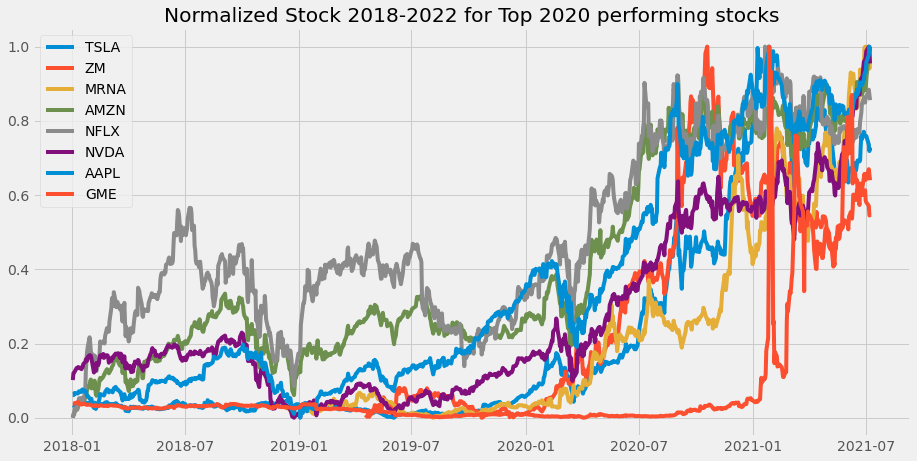

In [24]:
plot_stocks(df=s_close, year=year, periods=periods, title=f'Normalized Stock {year}-{year+periods} for Top 2020 performing stocks')

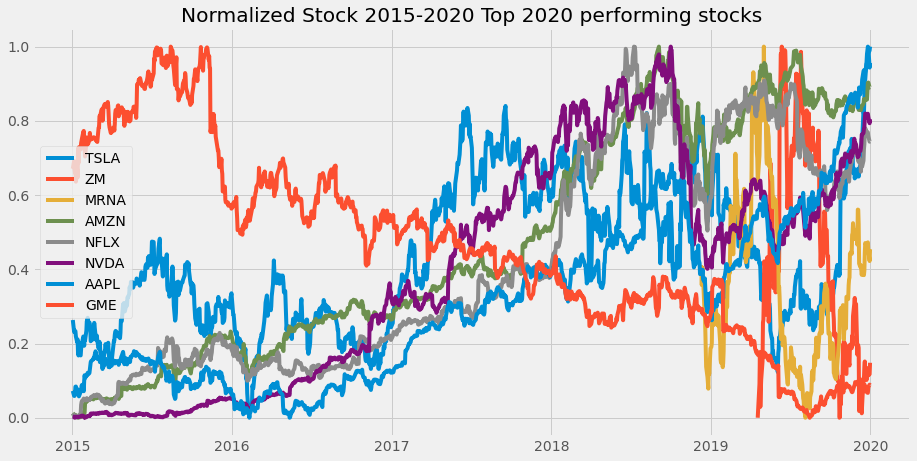

In [25]:
plot_stocks(df=s_close, year=2015, periods=4, title='Normalized Stock 2015-2020 Top 2020 performing stocks')

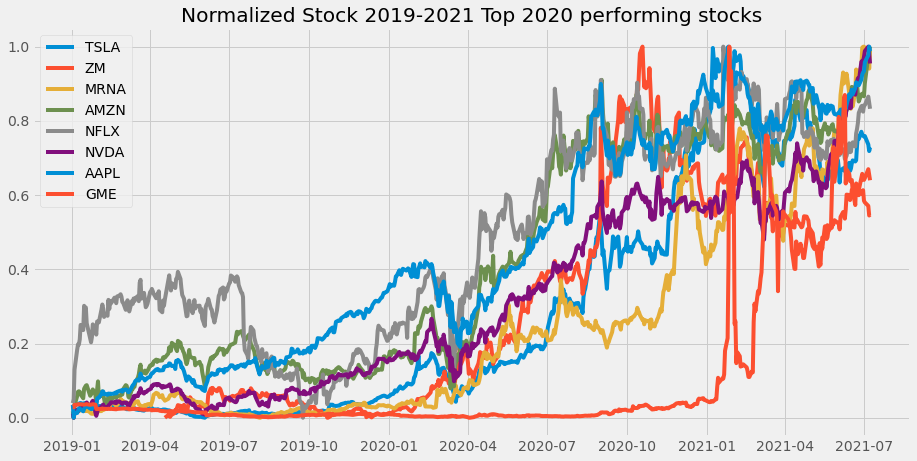

In [26]:
plot_stocks(df=s_close, year=2019, periods=2, title='Normalized Stock 2019-2021 Top 2020 performing stocks')

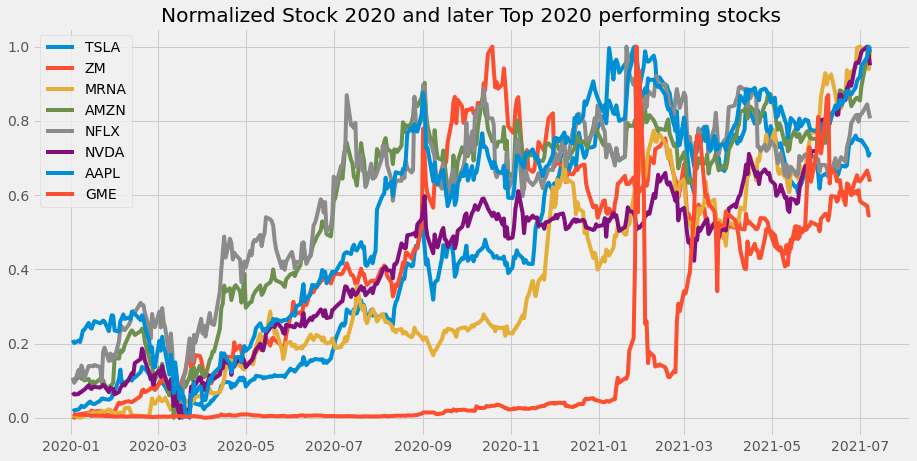

In [27]:
plot_stocks(df=s_close, year=2020, periods=2, title='Normalized Stock 2020 and later Top 2020 performing stocks')

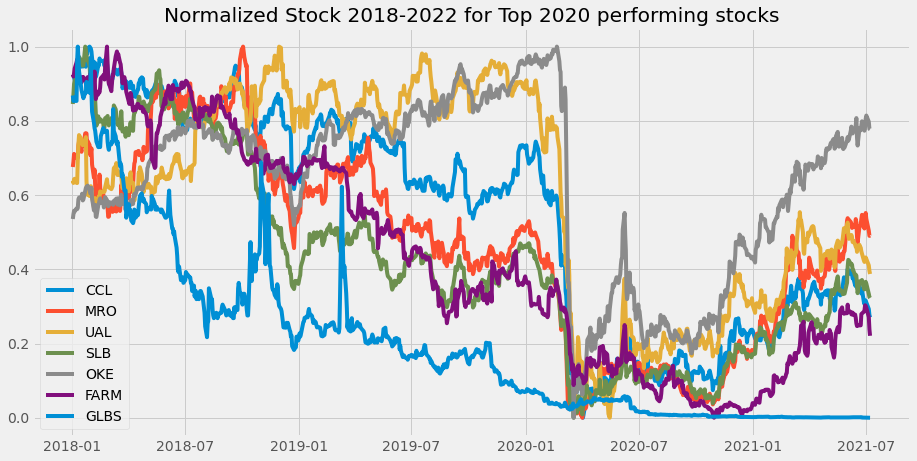

In [28]:
plot_stocks(df=p_close, year=year, periods=periods, title=f'Normalized Stock {year}-{year+periods} for Top 2020 performing stocks')

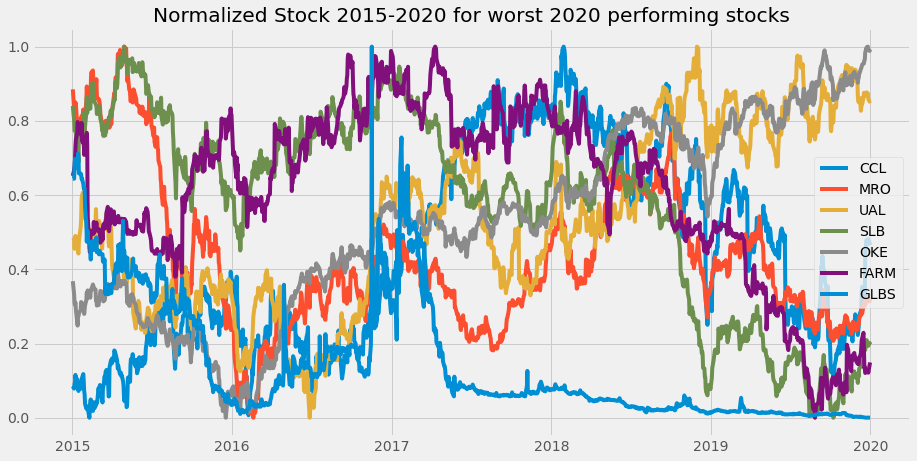

In [29]:
plot_stocks(df=p_close, year=2015, periods=4, title='Normalized Stock 2015-2020 for worst 2020 performing stocks')

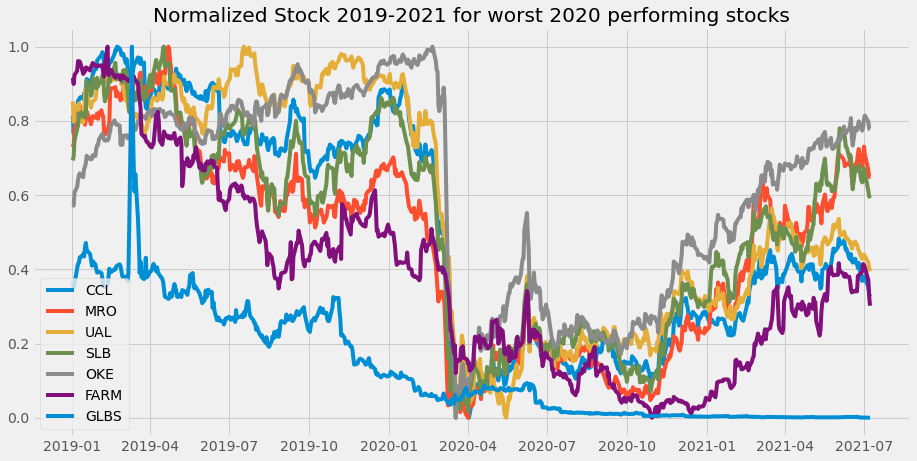

In [30]:
plot_stocks(df=p_close, year=2019, periods=2, title='Normalized Stock 2019-2021 for worst 2020 performing stocks')

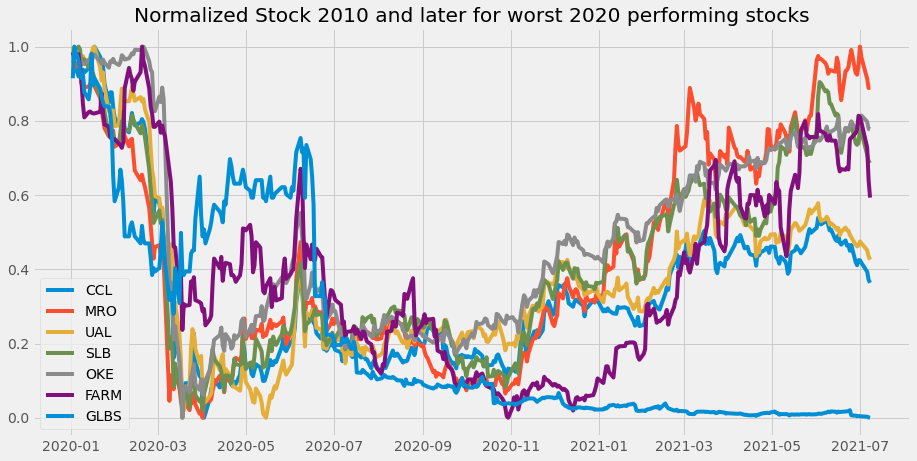

In [31]:
plot_stocks(df=p_close, year=2020, periods=2, title='Normalized Stock 2010 and later for worst 2020 performing stocks')

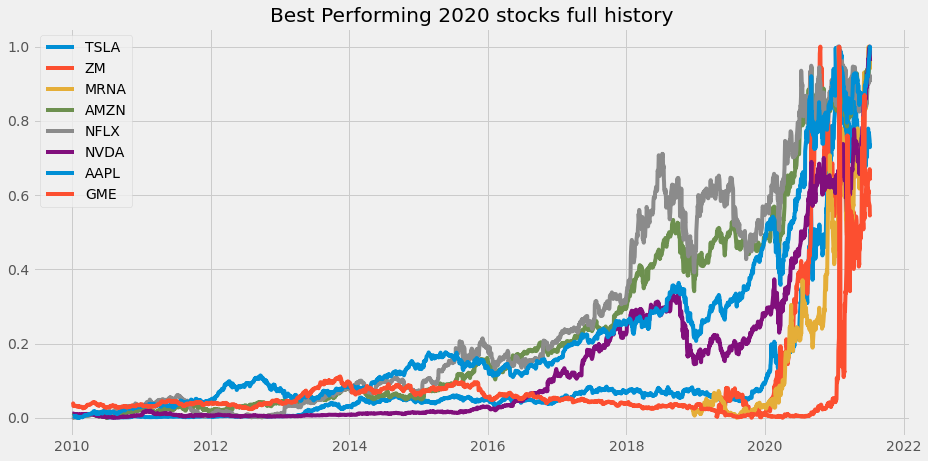

In [32]:
plot_stocks(df=s_close, year=2010, periods=11, title='Best Performing 2020 stocks full history')

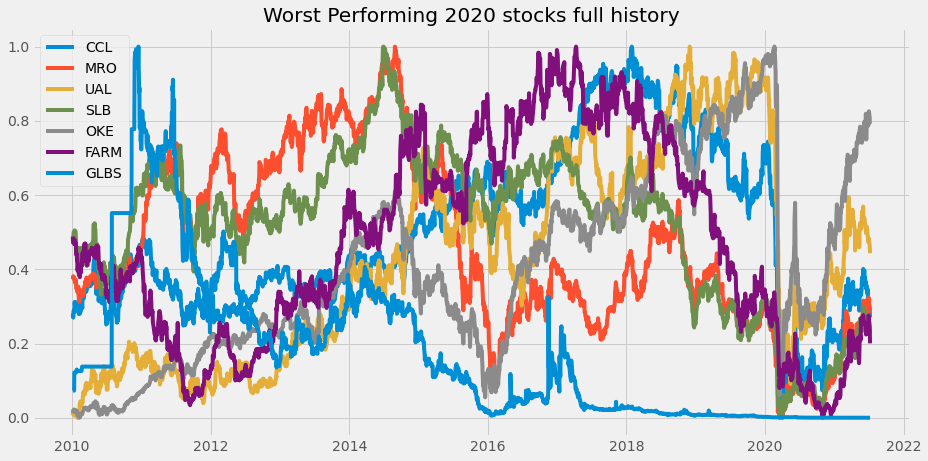

In [33]:
plot_stocks(df=p_close, year=2010, periods=11, title='Worst Performing 2020 stocks full history')

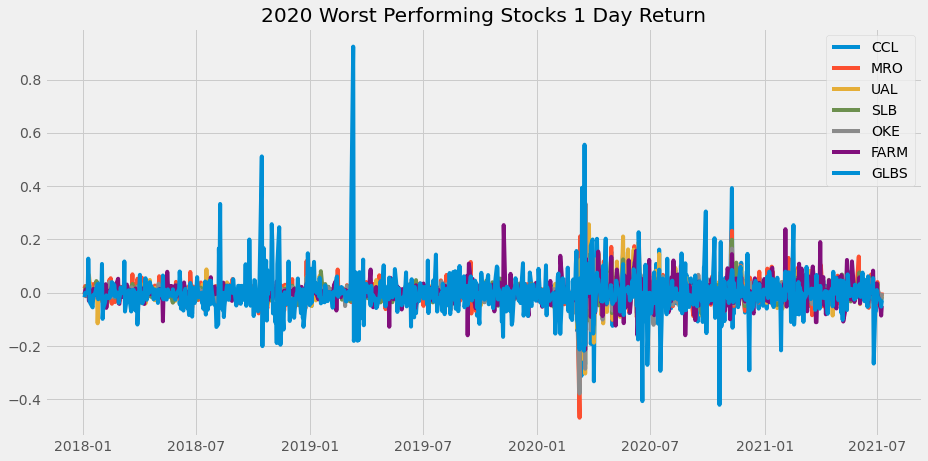

In [34]:
plot_stocks(df=p_close, year=year, periods=11, lag=1, title='2020 Worst Performing Stocks 1 Day Return')

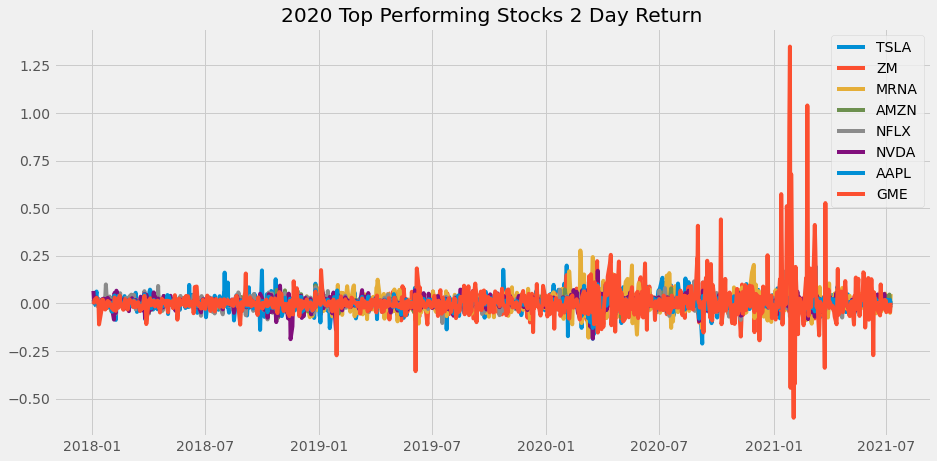

In [35]:
plot_stocks(df=s_close, year=year, periods=11, lag=1, title='2020 Top Performing Stocks 2 Day Return')

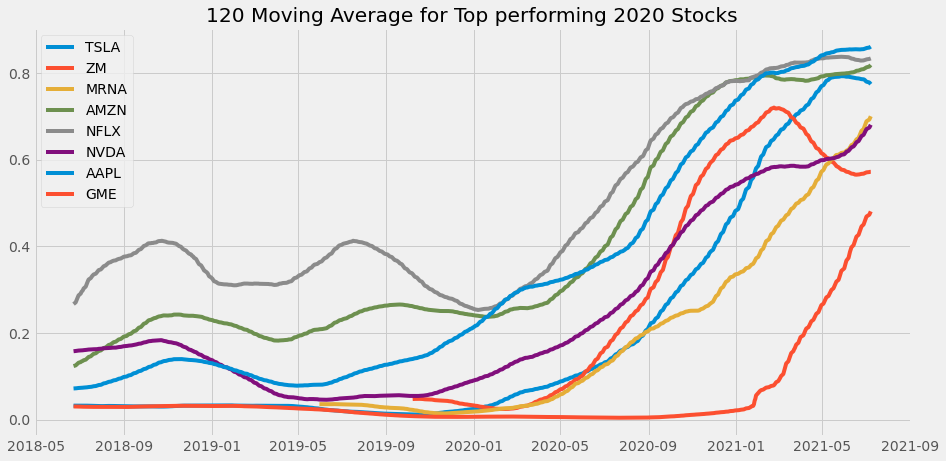

In [36]:
plot_stocks(df=s_close, year=year, periods=11, window=120, title='120 Moving Average for Top performing 2020 Stocks')

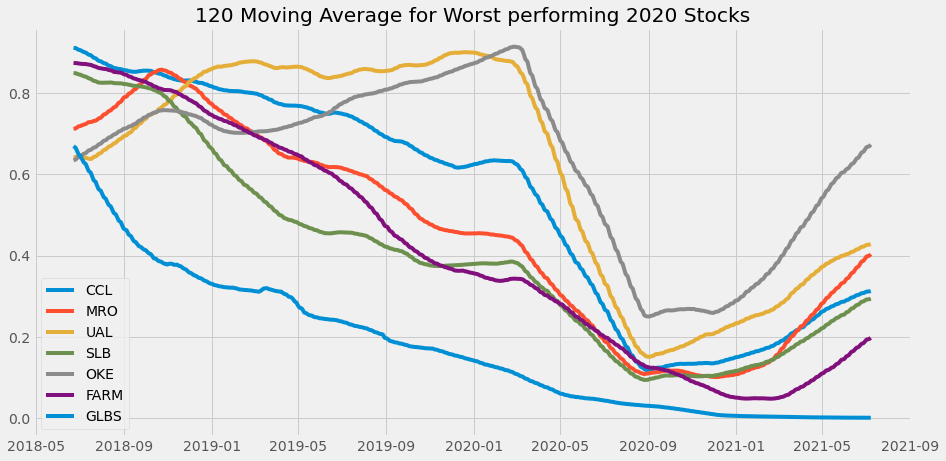

In [37]:
plot_stocks(df=p_close, year=year, periods=11, window=120, title='120 Moving Average for Worst performing 2020 Stocks')

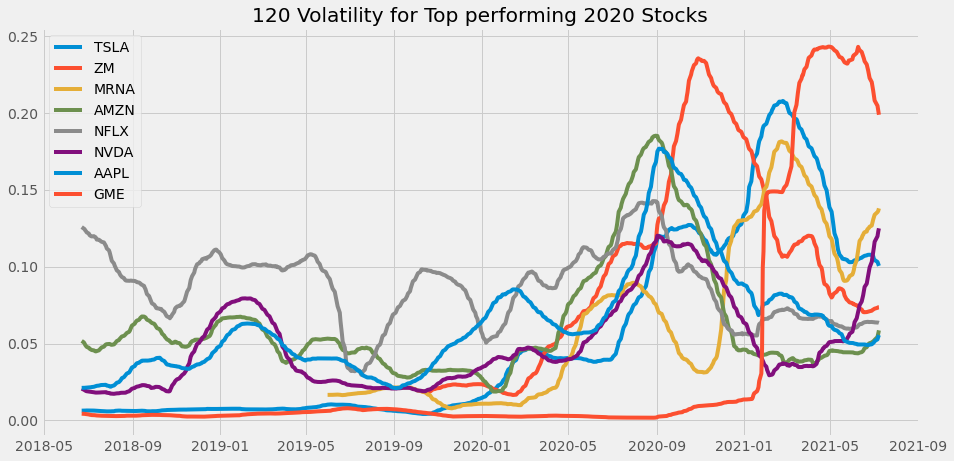

In [38]:
plot_stocks(df=s_close, year=year, periods=11, window=120, volatility=True, title='120 Volatility for Top performing 2020 Stocks')

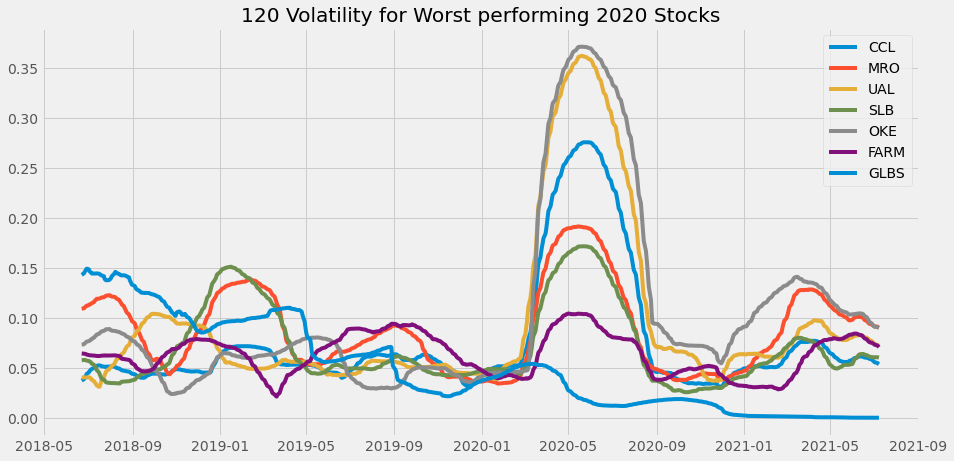

In [39]:
plot_stocks(df=p_close, year=year, periods=periods, window=120, volatility=True, title='120 Volatility for Worst performing 2020 Stocks')

# 4. Simulation with Monte Carlo (Experimentation)
* Monte Carlo GBM Simulation

# Monte Carlo Simulations and GBM 

Stochastic Differential Equation (SDE) for geometric Brownian motion:

$$ \Large S_t = S_{t-1}e^{(r-\sigma^2 / 2)t+\sigma W_t} $$





In [14]:
#df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close], axis=1).dropna()
df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close if i[0] not in ['ZM', 'MRNA']], axis=1).dropna()

In [15]:
df_all.columns

Index(['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME'], dtype='object')

In [44]:
def stock_price_simulation(df, weights):
    annual_vol = (df/df.shift(1)-1)[1:].std()*np.sqrt(252).tolist()
    mu = df.pct_change().iloc[:-252].mean().tolist()
    sigma = df.pct_change().iloc[:-252].std().tolist()
    last_prices = df[-1:].values.tolist()[0]
    T = 1.0
    N=500
    delta_t = T/N
    iterations = 1000
    time_steps = T/delta_t
    price = pd.DataFrame()
    
    for j in range(iterations):
        sim = [[p] for p in last_prices]
        for s in range(len(last_prices)):
            St = sim[s][0]
            for i in range(int(time_steps)):
                St = sim[s][-1]*np.exp((mu[s]-0.5*sigma[s]**2)*delta_t + sigma[s]*np.sqrt(delta_t)*np.random.normal(0, 1))
                sim[s].append(St)
            df = (pd.DataFrame(sim).T.pct_change()).dot(weights)
        price[j] = (1+df.fillna(0)).cumprod()
    return price 

## Simulate a porfolio of stocks with weights

### Experiment 1: All stocks ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME'] with weights [0.05, 0.05, 0.05, 0.25, 0.15, 0.175, 0.25, 0.025]

In [45]:
all_strong = stock_price_simulation(df_all, weights=[0.05, 0.05, 0.05, 0.25, 0.15, 0.175, 0.25, 0.025])   

<AxesSubplot:>

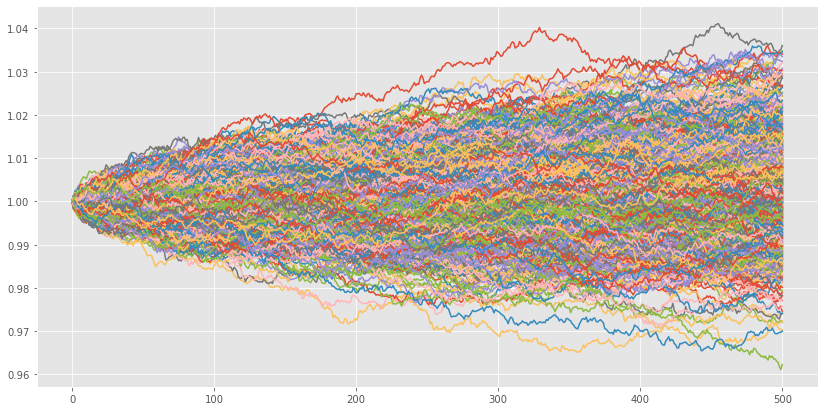

In [856]:
all_strong.plot(legend=False, title=f'Simulated Trade {df_all.columns}')

In [857]:
confidence_interval = all_strong.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = all_strong.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
all_metrics = metrics.append(ci_series)
all_metrics

count           1000.000000
mean               1.002764
std                0.011153
min                0.962281
25%                0.995096
50%                1.002834
75%                1.010183
max                1.036047
95% CI Lower       0.981868
95% CI Upper       1.024969
Name: 500, dtype: float64

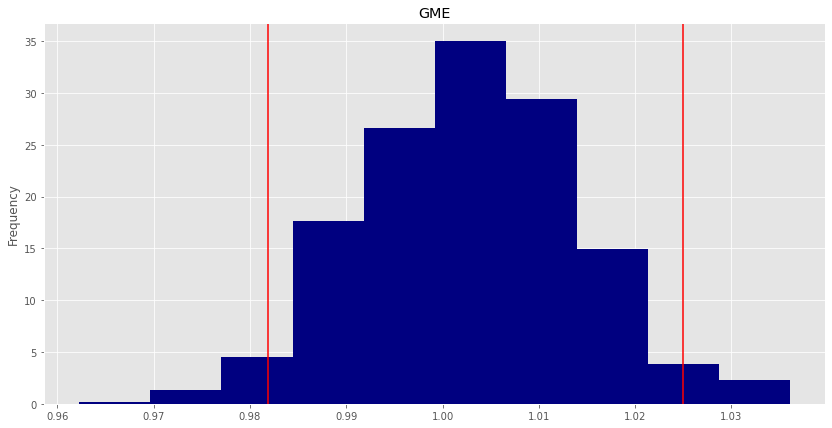

In [858]:
all_strong.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title='Portfolio of all Strong Performers')
plt.axvline(all_metrics[8], color='r')
plt.axvline(all_metrics[9], color='r')
plt.show()

In [859]:
ci_lower = round(all_metrics[8]*1000,2)
ci_upper = round(all_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $981.87 and $1024.97.


### Experiment 2: ['AAPL', 'AMZN'] porfolio with 50/50 split

In [865]:
amz_aapl = stock_price_simulation(df_all[['AAPL', 'AMZN']], [0.5, 0.5])  

<AxesSubplot:>

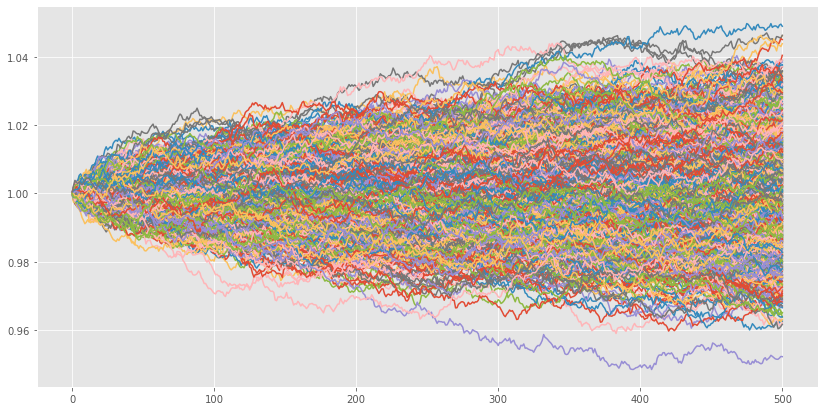

In [866]:
amz_aapl.plot(legend=False, title='Simulated Trade AAPL and AMZN')

In [867]:
confidence_interval = amz_aapl.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = price_path.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
amz_aapl_metrics = metrics.append(ci_series)
amz_aapl_metrics

count           1000.000000
mean               1.001459
std                0.015800
min                0.952239
25%                0.990259
50%                1.001763
75%                1.012106
max                1.048948
95% CI Lower       0.971198
95% CI Upper       1.032735
Name: 500, dtype: float64

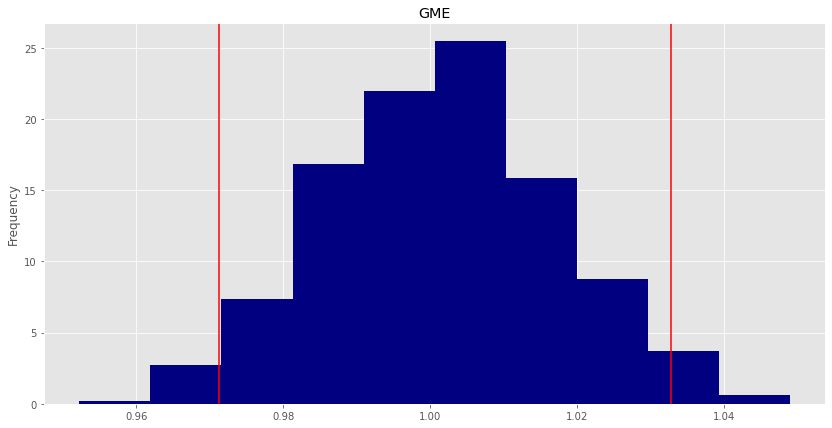

In [868]:
amz_aapl.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title='Porfolio 50/50 AAPL & AMZN')
plt.axvline(amz_aapl_metrics[8], color='r')
plt.axvline(amz_aapl_metrics[9], color='r')
plt.show()

In [869]:
ci_lower = round(amz_aapl_metrics[8]*1000,2)
ci_upper = round(amz_aapl_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $971.2 and $1032.74.


### Experiment 3: Low performing stocks porftolio ['FARM', 'GLBS'] with 50/50 split

In [18]:
df_all_p = pd.concat([i[1].rename(columns={'close':i[0]}) for i in p_close], axis=1).dropna()

In [19]:
df_all_p.columns

Index(['CCL', 'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS'], dtype='object')

<AxesSubplot:>

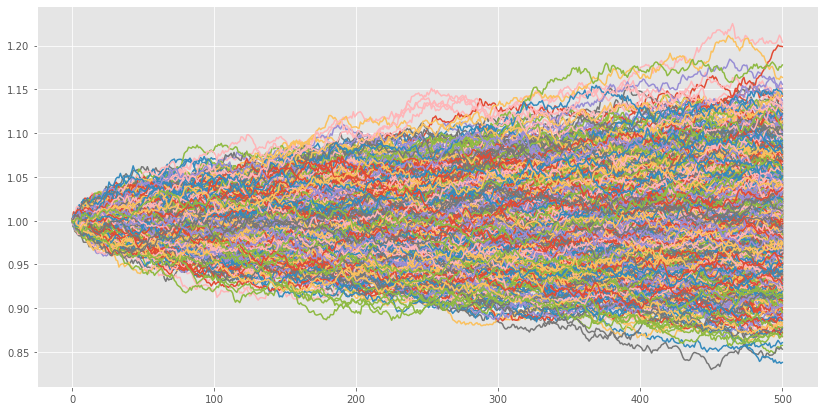

In [876]:
weak_ps = stock_price_simulation(df_all_p[['FARM', 'GLBS']], [0.5, 0.5])  
weak_ps.plot(legend=False, title='Simulated Trade FARM & GLBS')

In [877]:
confidence_interval = weak_ps.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = price_path.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
weak_ps_metrics = metrics.append(ci_series)
weak_ps_metrics

count           1000.000000
mean               1.003027
std                0.056792
min                0.837997
25%                0.964407
50%                1.002566
75%                1.041367
max                1.203717
95% CI Lower       0.891645
95% CI Upper       1.120202
Name: 500, dtype: float64

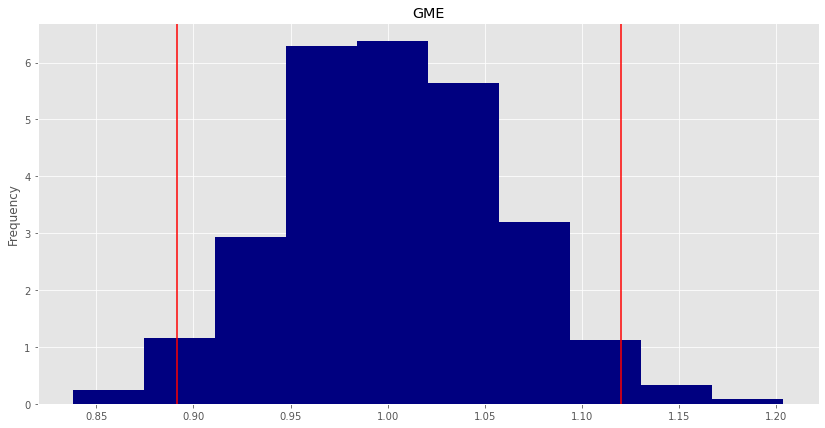

In [878]:
weak_ps.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title= "Porfolio 50/50 FARM & GLBS")
plt.axvline(weak_ps_metrics[8], color='r')
plt.axvline(weak_ps_metrics[9], color='r')
plt.show()

In [879]:
ci_lower = round(weak_ps_metrics[8]*1000,2)
ci_upper = round(weak_ps_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $891.64 and $1120.2.


# 5. Creating Features

In [20]:
porfolio = ['TSLA', 'AAPL', 'NFLX']
weights = [0.33, 0.33, 0.33]

In [21]:
stocks_combines = pd.concat([df_all, df_all_p], join='inner', axis=1)

In [22]:
stocks_combines.columns

Index(['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME', 'CCL',
       'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS'],
      dtype='object')

In [51]:
porfolio_df = stocks_combines[porfolio]

In [52]:
wt_returns = porfolio_df.pct_change().dropna() * weights

In [53]:
wt_returns.sum(axis=1)

date
2019-04-22    0.003951
2019-04-23    0.010183
2019-04-24   -0.013681
2019-04-25   -0.022270
2019-04-26   -0.012378
                ...   
2021-07-01    0.003213
2021-07-02    0.007216
2021-07-06    0.000200
2021-07-07   -0.005005
2021-07-08   -0.002060
Length: 559, dtype: float64

In [54]:
porfolio_df['total'] = (porfolio_df*weights).sum(axis=1)
porfolio_df

<ipython-input-54-4a9c685bfff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porfolio_df['total'] = (porfolio_df*weights).sum(axis=1)


TSLA        AAPL    NFLX       total
date                                               
2019-04-18   54.652   49.831914  360.35  153.395192
2019-04-22   52.550   49.995690  377.34  158.362278
2019-04-23   52.780   50.716793  381.89  160.177642
2019-04-24   51.732   50.638572  374.23  157.278189
2019-04-25   49.526   50.179021  368.33  154.451557
...             ...         ...     ...         ...
2021-07-01  677.920  137.270000  533.54  445.080900
2021-07-02  678.900  139.960000  533.98  446.437200
2021-07-06  659.580  142.020000  541.64  443.269200
2021-07-07  644.650  144.570000  535.96  437.309400
2021-07-08  652.810  143.240000  530.76  437.847300

[560 rows x 4 columns]

In [55]:
wt_returns = porfolio_df.pct_change()['total'].dropna()

<AxesSubplot:xlabel='date'>

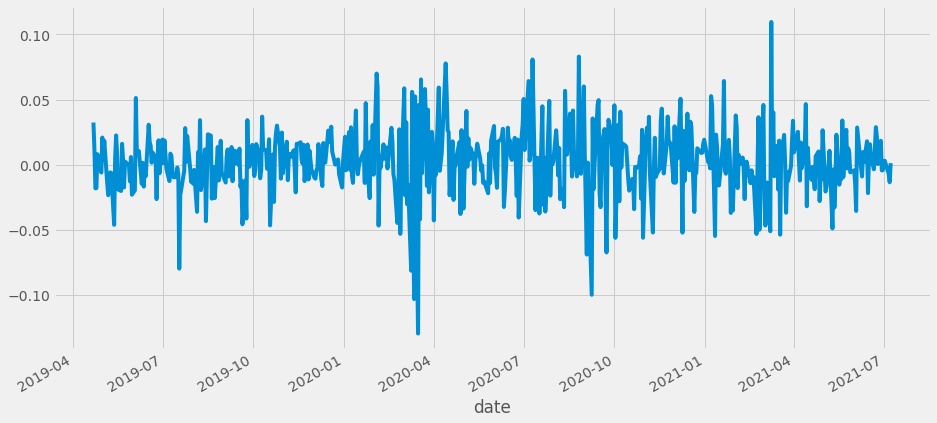

In [56]:
wt_returns.plot()

### Optimize Porfolio Weights

In [23]:
stocks_combines

TSLA      ZM    MRNA     AMZN    NFLX        NVDA        AAPL  \
date                                                                           
2019-04-18   54.652   62.00   22.51  1861.69  360.35  185.352015   49.831914   
2019-04-22   52.550   65.70   23.63  1887.31  377.34  187.510973   49.995690   
2019-04-23   52.780   69.00   24.70  1923.77  381.89  189.699778   50.716793   
2019-04-24   51.732   63.20   25.76  1901.75  374.23  190.197234   50.638572   
2019-04-25   49.526   65.00   25.74  1902.25  368.33  185.958911   50.179021   
...             ...     ...     ...      ...     ...         ...         ...   
2021-07-01  677.920  386.48  235.11  3432.97  533.54  808.480000  137.270000   
2021-07-02  678.900  388.89  234.30  3510.98  533.98  819.480000  139.960000   
2021-07-06  659.580  401.12  233.34  3675.74  541.64  827.940000  142.020000   
2021-07-07  644.650  393.91  221.90  3696.58  535.96  814.870000  144.570000   
2021-07-08  652.810  386.01  232.79  3731.41  530.76  796.110000  143.240000   

               GME        CCL        MRO    UAL        SLB        OKE   FARM  \
date                                                                           
2019-04-18    8.77  51.325599  17.128298  88.28  41.811855  57.154701  20.50   
2019-04-22    8.65  50.789661  18.255928  87.56  42.077997  57.807756  20.24   
2019-04-23    8.89  51.440443  18.158718  87.97  42.114706  57.758157  20.37   
2019-04-24    9.01  51.421302  17.643508  88.03  40.600449  57.890421  20.23   
2019-04-25    8.95  51.517005  17.429648  86.86  39.737781  57.667225  20.20   
...            ...        ...        ...    ...        ...        ...    ...   
2021-07-01  204.36  26.360000  14.170000  53.08  33.070000  56.930000  12.65   
2021-07-02  202.83  26.060000  13.850000  52.77  32.790000  57.390000  12.49   
2021-07-06  199.56  25.020000  13.210000  51.44  31.170000  56.490000  11.72   
2021-07-07  190.66  24.080000  12.930000  50.30  30.680000  55.440000  10.72   
2021-07-08  191.38  23.720000  12.950000  49.66  30.530000  55.380000  10.19   

              GLBS  
date                
2019-04-18  281.00  
2019-04-22  276.00  
2019-04-23  277.00  
2019-04-24  289.00  
2019-04-25  285.00  
...            ...  
2021-07-01    3.86  
2021-07-02    3.79  
2021-07-06    3.68  
2021-07-07    3.49  
2021-07-08    3.39  

[560 rows x 15 columns]

<AxesSubplot:xlabel='date'>

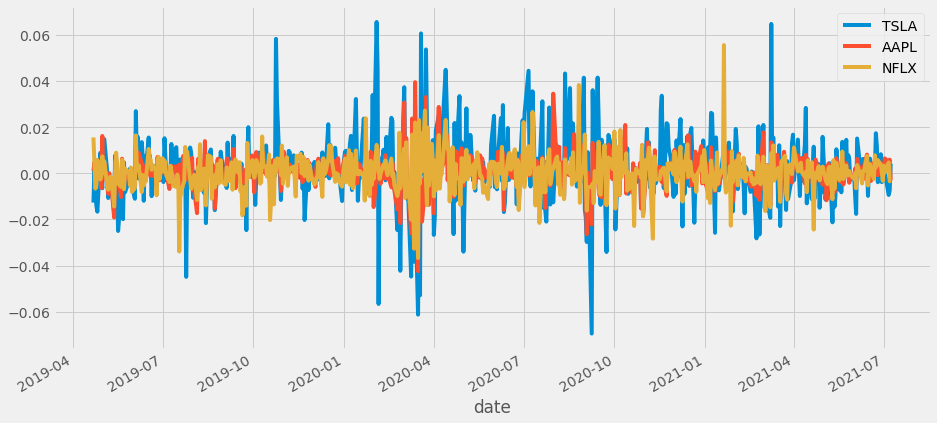

In [64]:
(stocks_combines[porfolio].pct_change() * weights).plot()

<AxesSubplot:xlabel='date'>

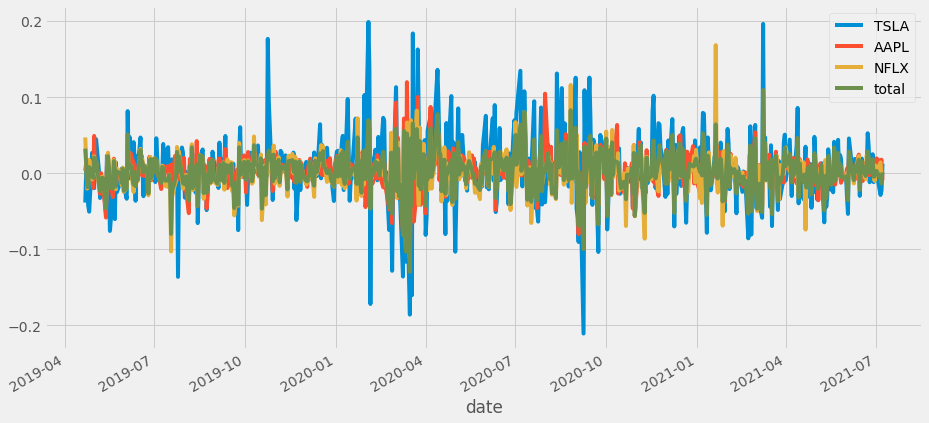

In [60]:
porfolio_df.pct_change().plot()

# 6. Time Series Analysis

In [24]:
from IPython.display import Markdown, display_markdown
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [35]:
# %whos

In [34]:
df_all

TSLA      ZM    MRNA     AMZN    NFLX        NVDA        AAPL  \
date                                                                           
2019-04-18   54.652   62.00   22.51  1861.69  360.35  185.352015   49.831914   
2019-04-22   52.550   65.70   23.63  1887.31  377.34  187.510973   49.995690   
2019-04-23   52.780   69.00   24.70  1923.77  381.89  189.699778   50.716793   
2019-04-24   51.732   63.20   25.76  1901.75  374.23  190.197234   50.638572   
2019-04-25   49.526   65.00   25.74  1902.25  368.33  185.958911   50.179021   
...             ...     ...     ...      ...     ...         ...         ...   
2021-07-01  677.920  386.48  235.11  3432.97  533.54  808.480000  137.270000   
2021-07-02  678.900  388.89  234.30  3510.98  533.98  819.480000  139.960000   
2021-07-06  659.580  401.12  233.34  3675.74  541.64  827.940000  142.020000   
2021-07-07  644.650  393.91  221.90  3696.58  535.96  814.870000  144.570000   
2021-07-08  652.810  386.01  232.79  3731.41  530.76  796.110000  143.240000   

               GME  
date                
2019-04-18    8.77  
2019-04-22    8.65  
2019-04-23    8.89  
2019-04-24    9.01  
2019-04-25    8.95  
...            ...  
2021-07-01  204.36  
2021-07-02  202.83  
2021-07-06  199.56  
2021-07-07  190.66  
2021-07-08  191.38  

[560 rows x 8 columns]

## ACF and PACF

**TSLA**

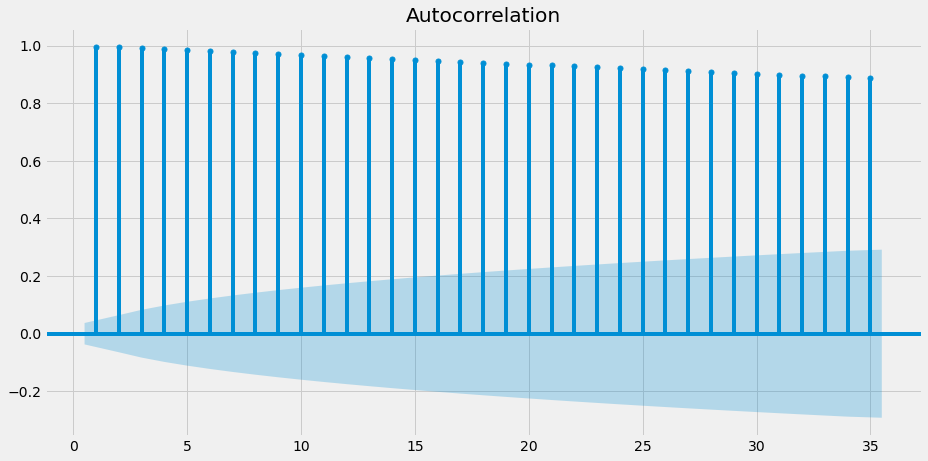

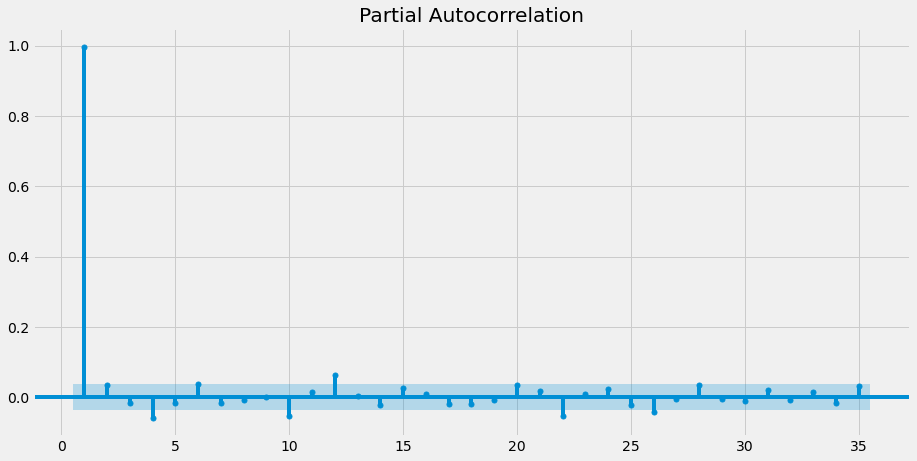

**AMZN**

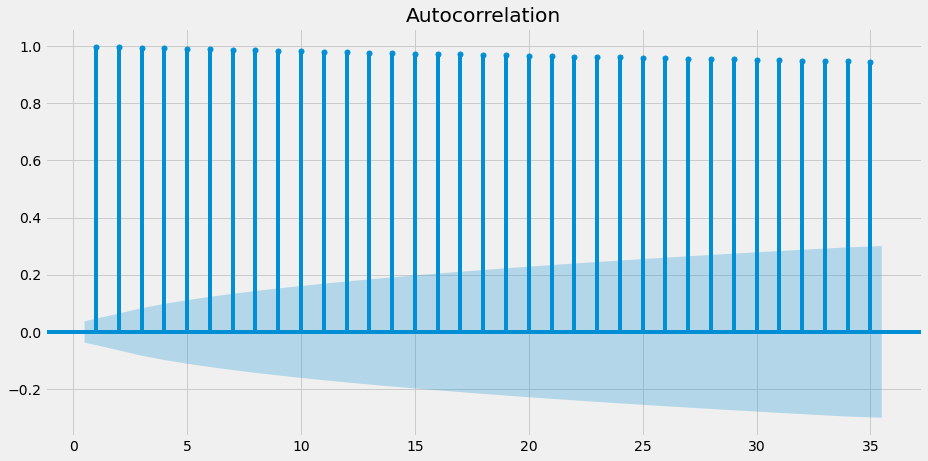

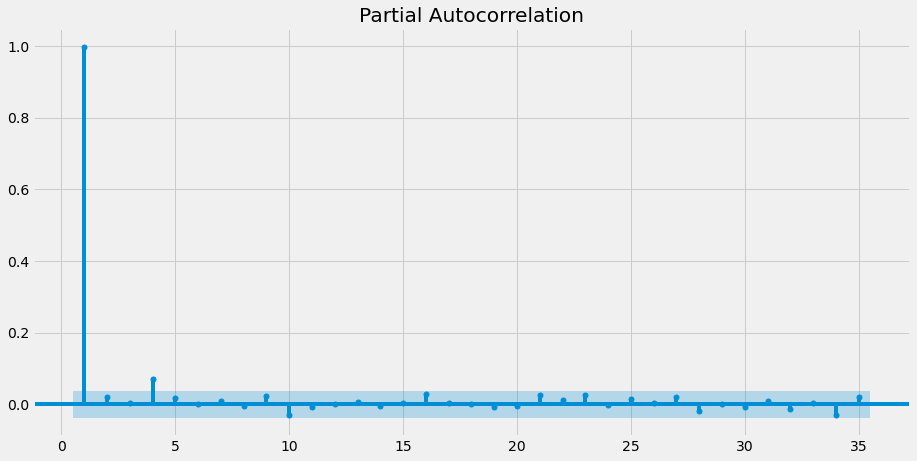

**NFLX**

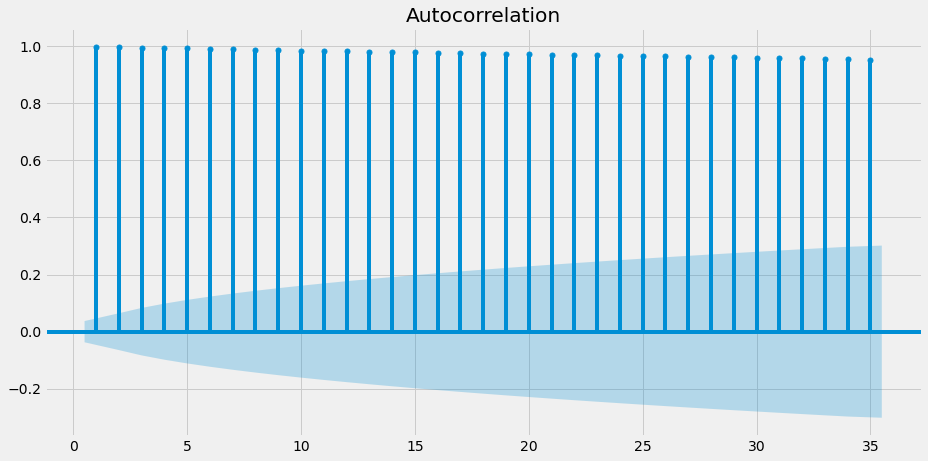

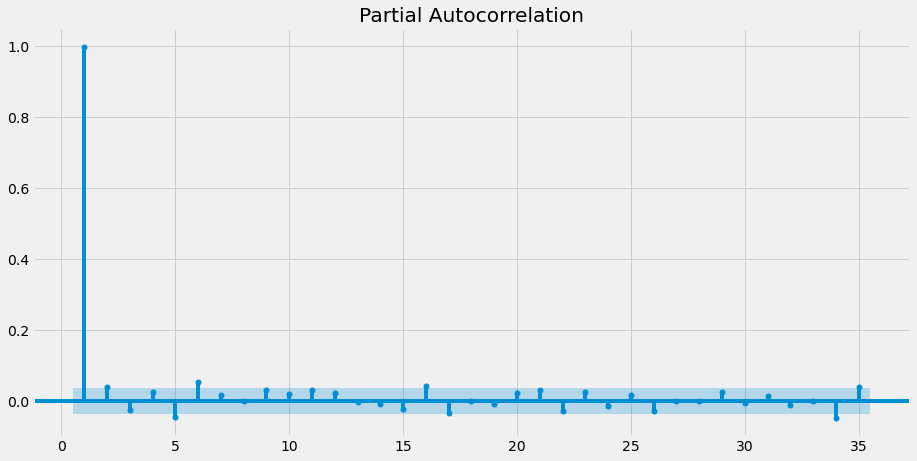

**NVDA**

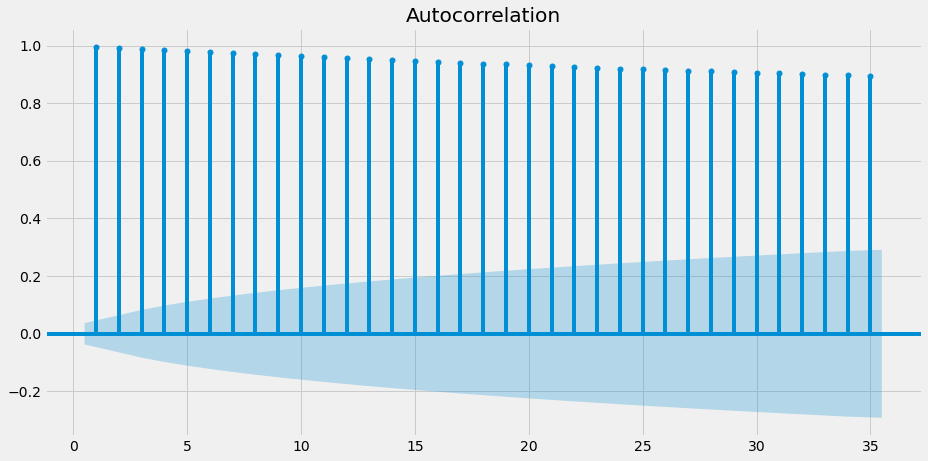

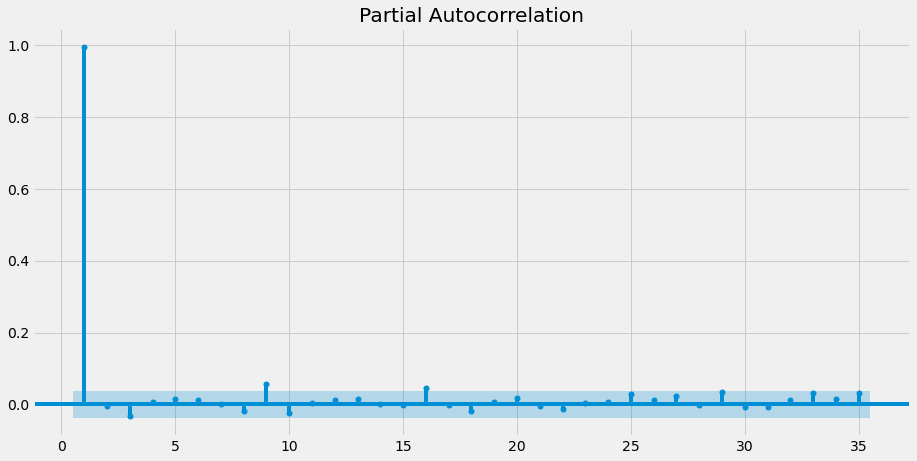

**AAPL**

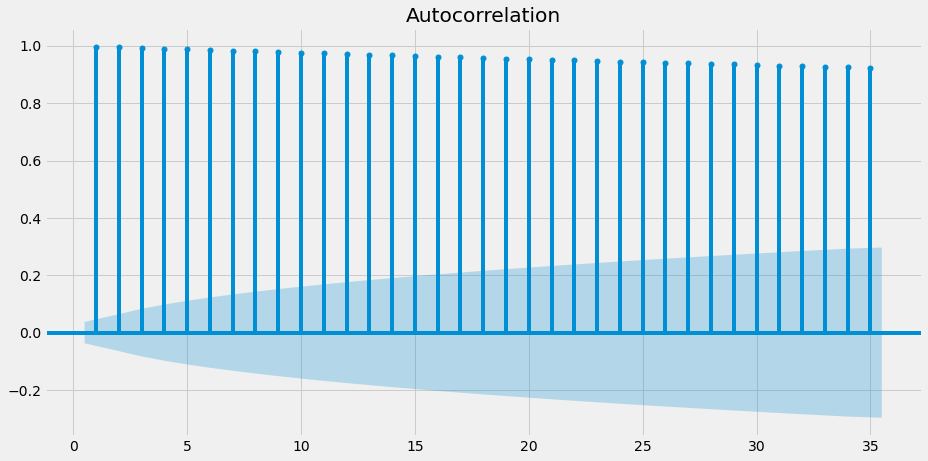

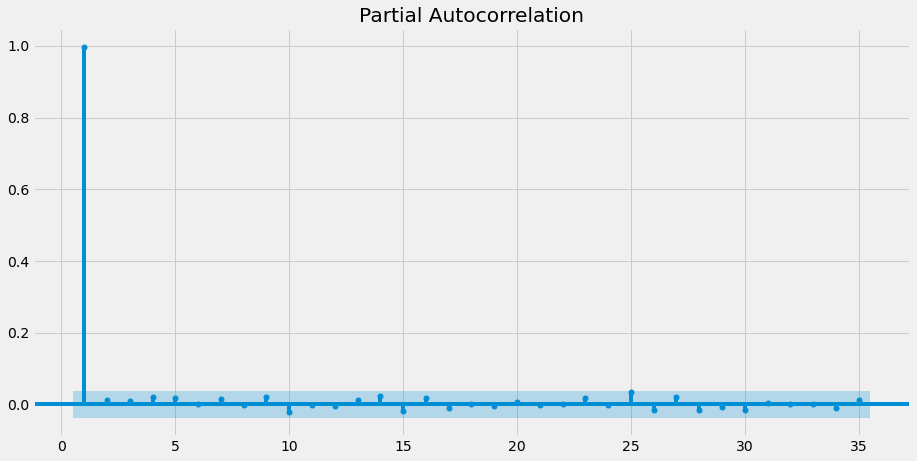

**GME**

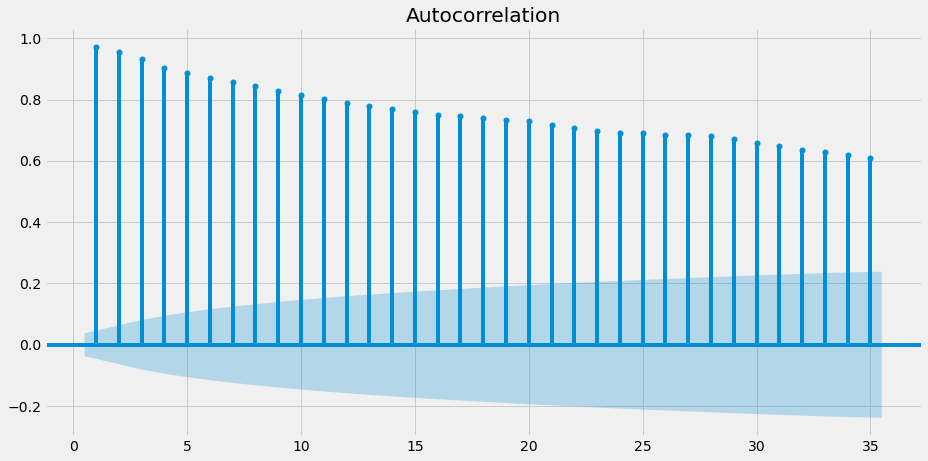

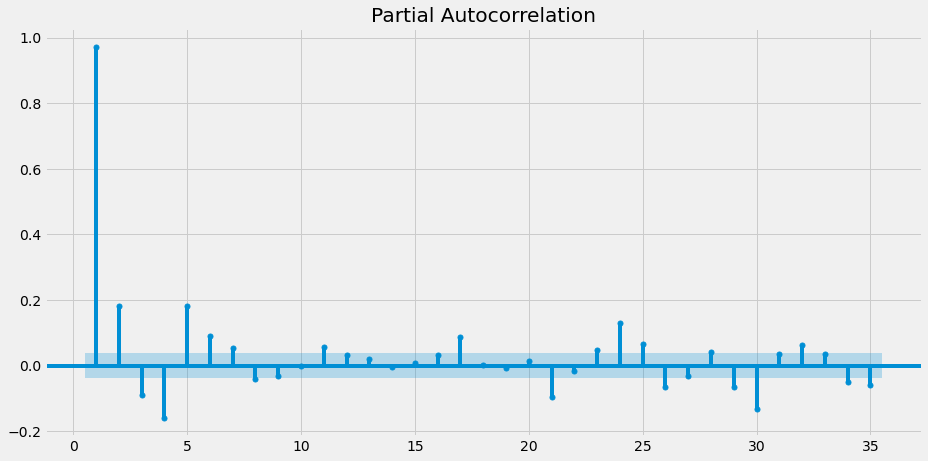

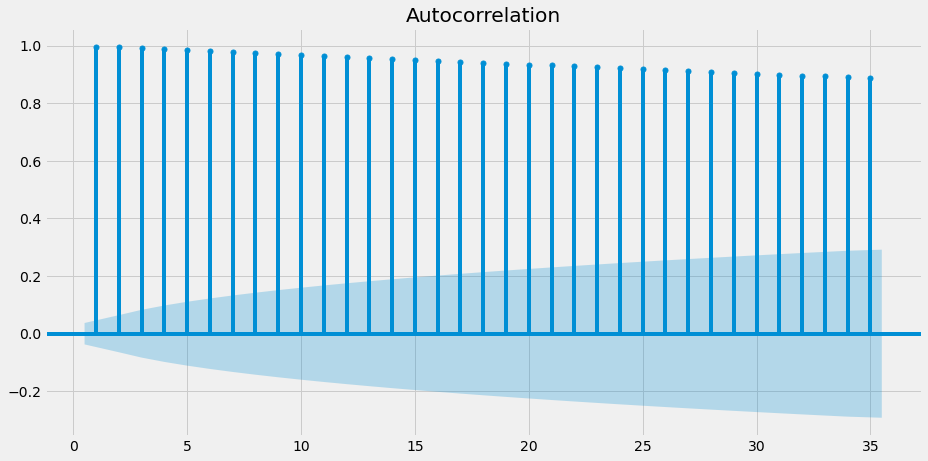

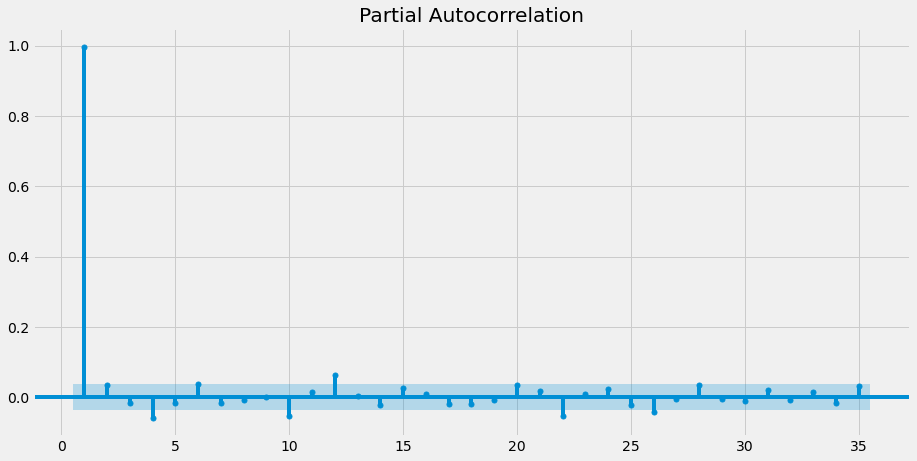

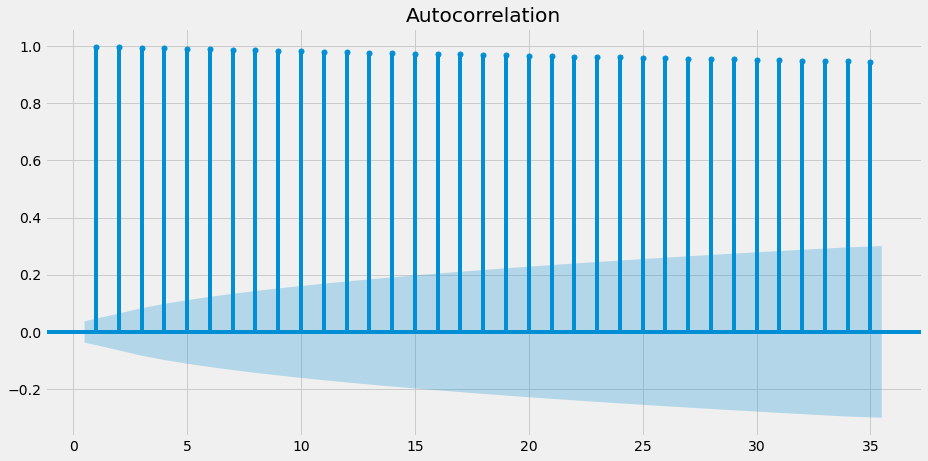

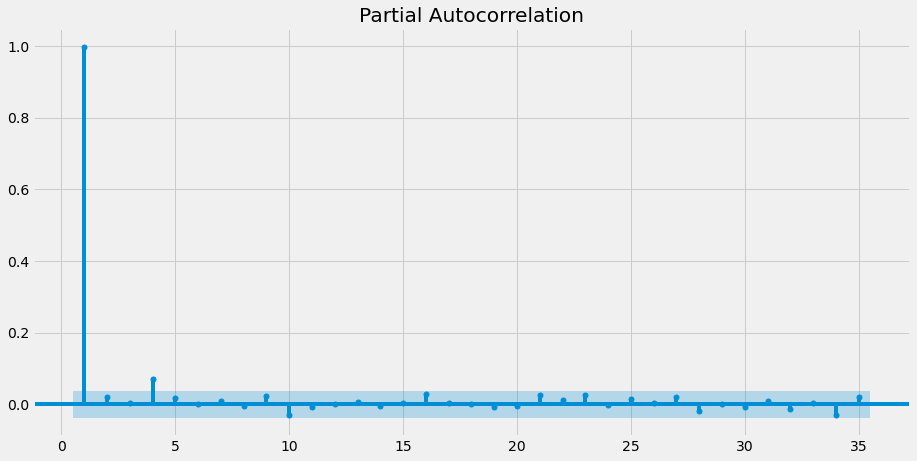

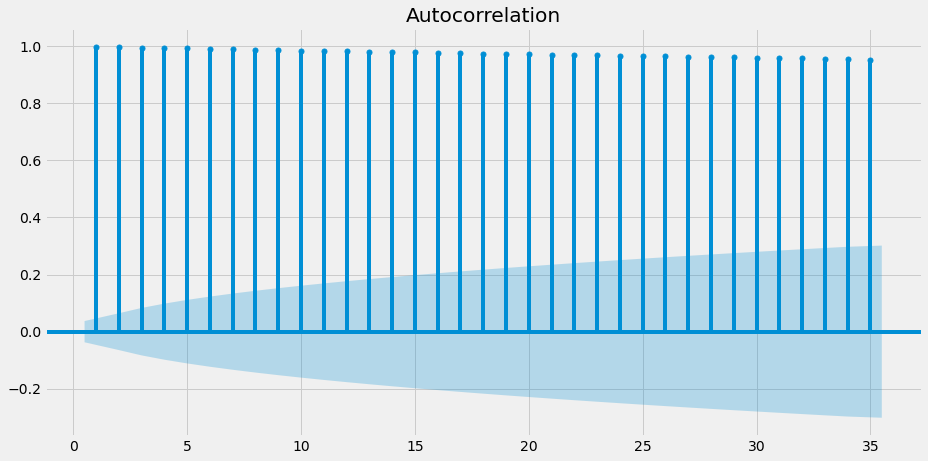

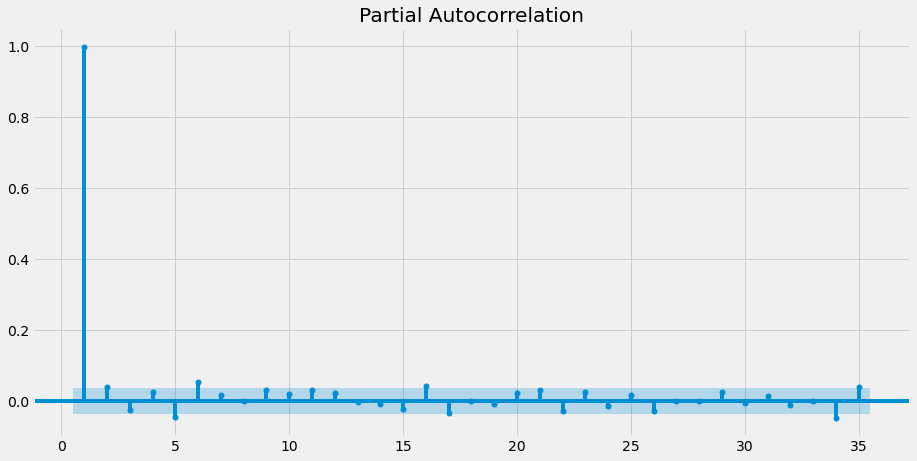

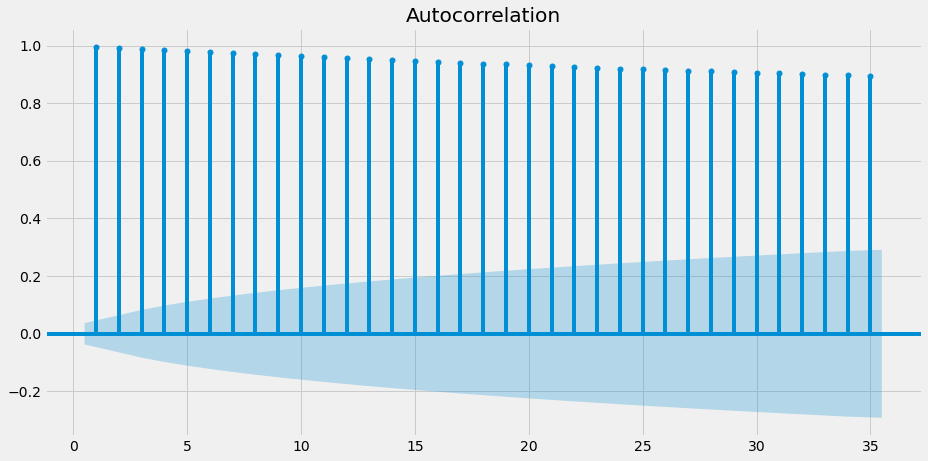

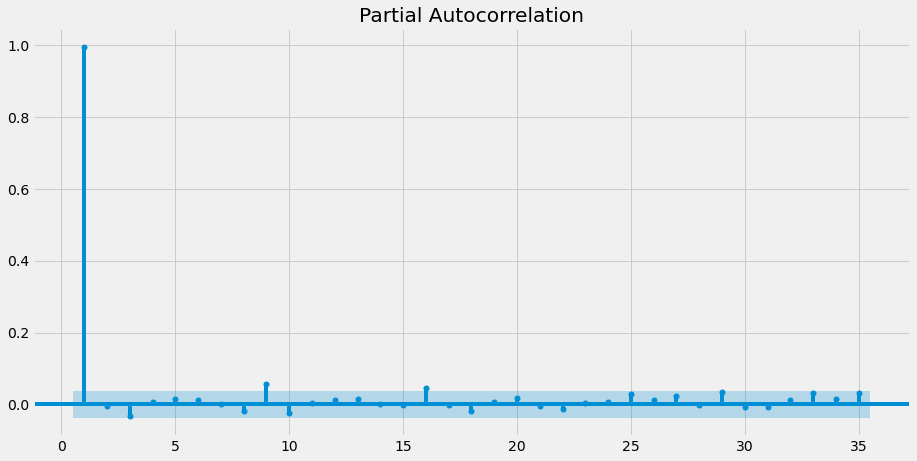

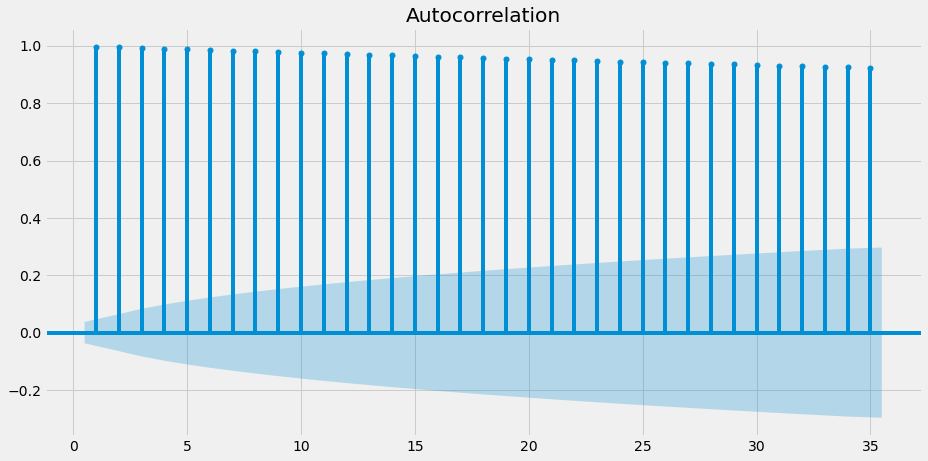

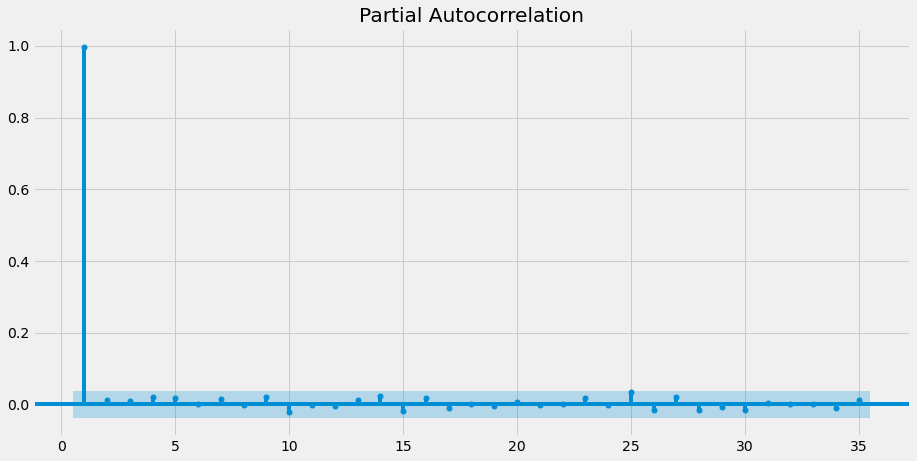

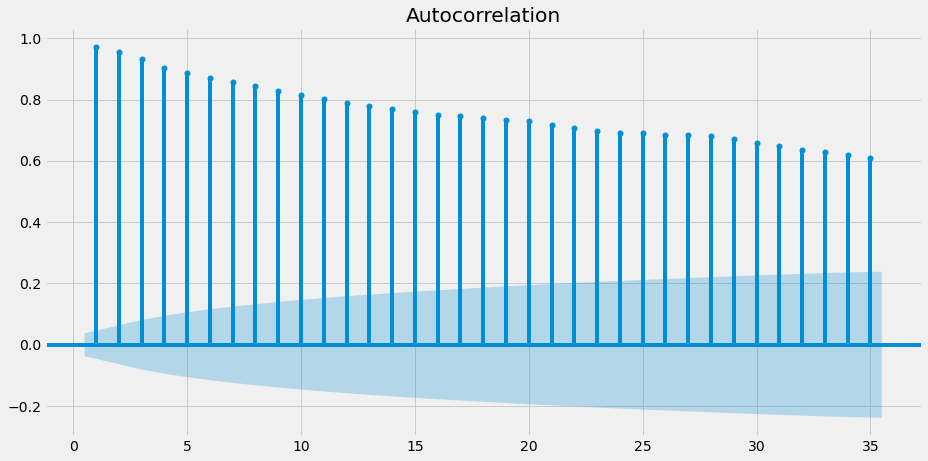

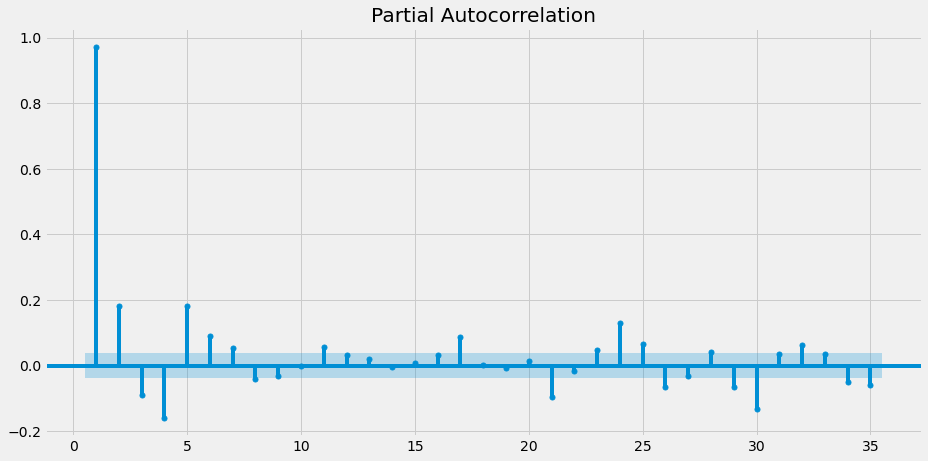

In [449]:
for symbol in df_all.columns:
    display(Markdown(f'**{symbol}**'))
    display(plot_acf(df_all[symbol], zero=False, lags=35))
    display(plot_pacf(df_all[symbol], zero=False, lags=35))

**CCL**

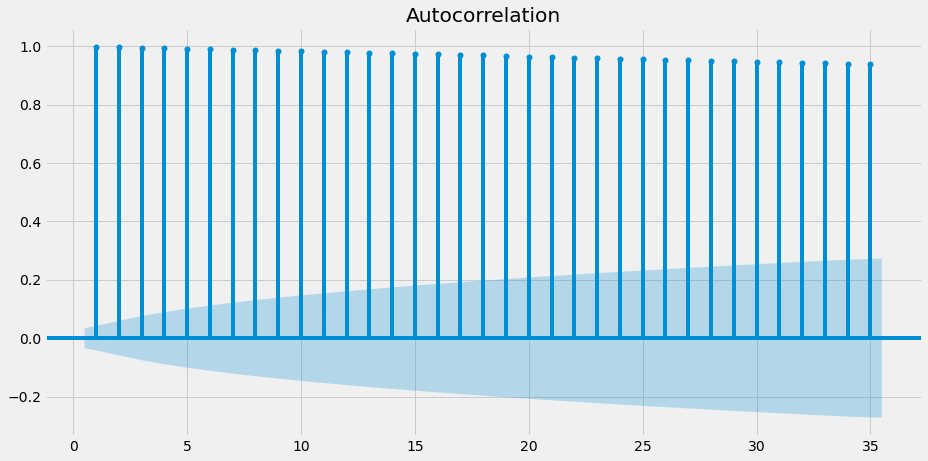

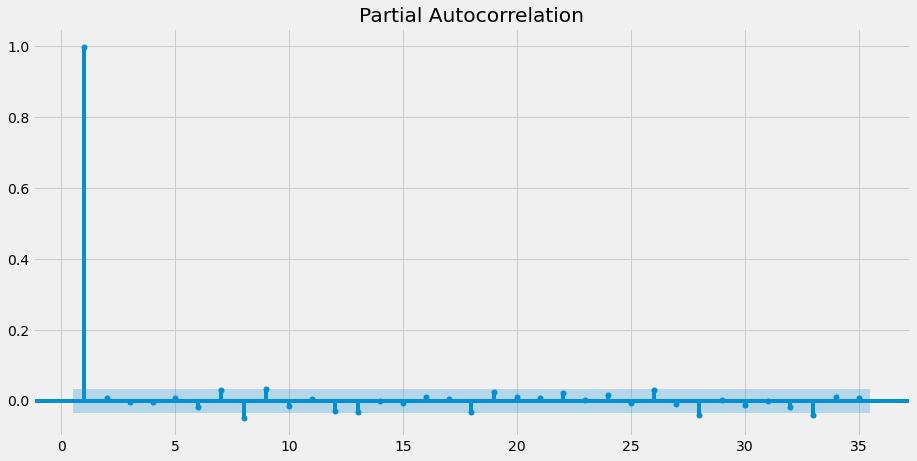

**MRO**

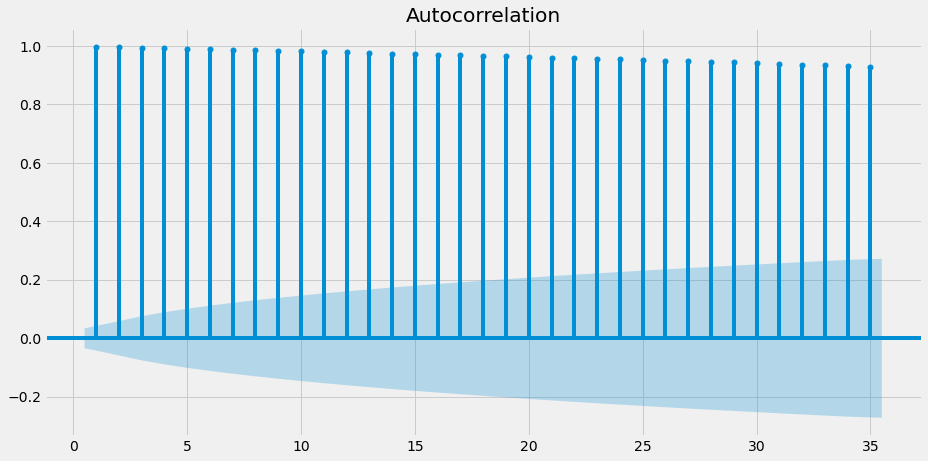

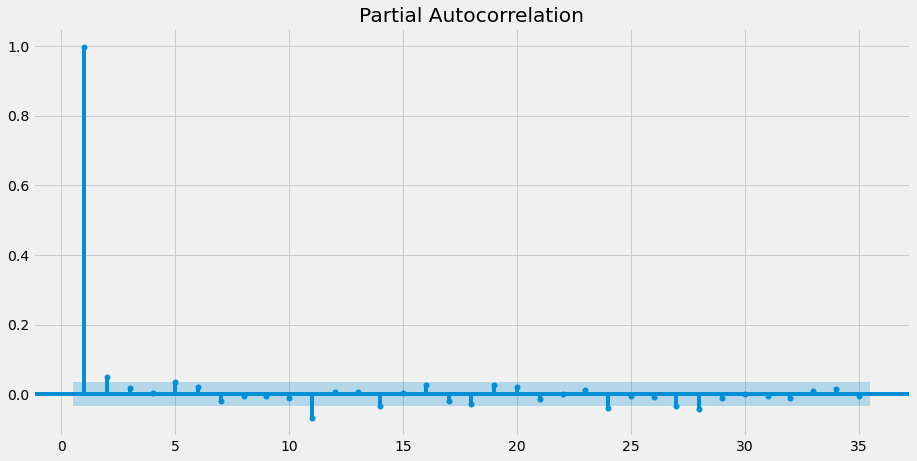

**UAL**

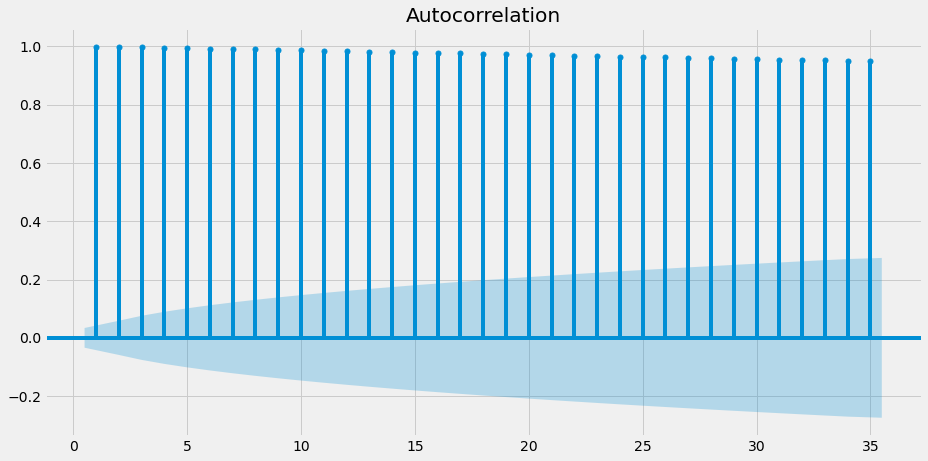

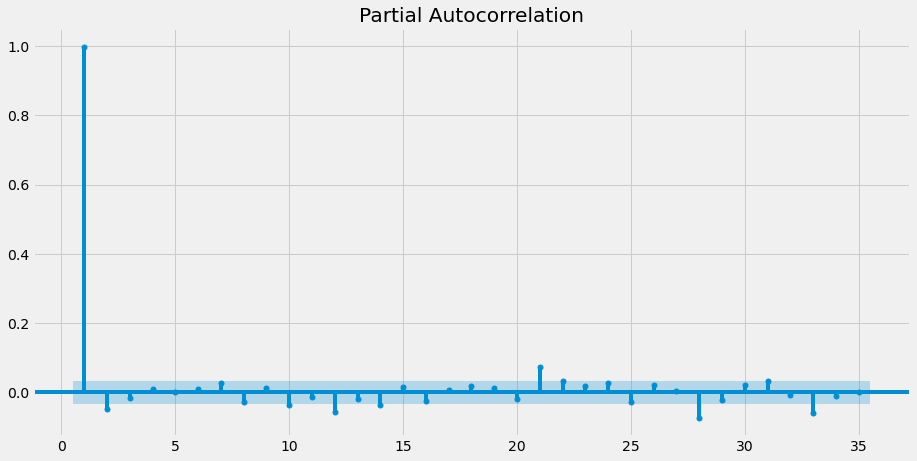

**SLB**

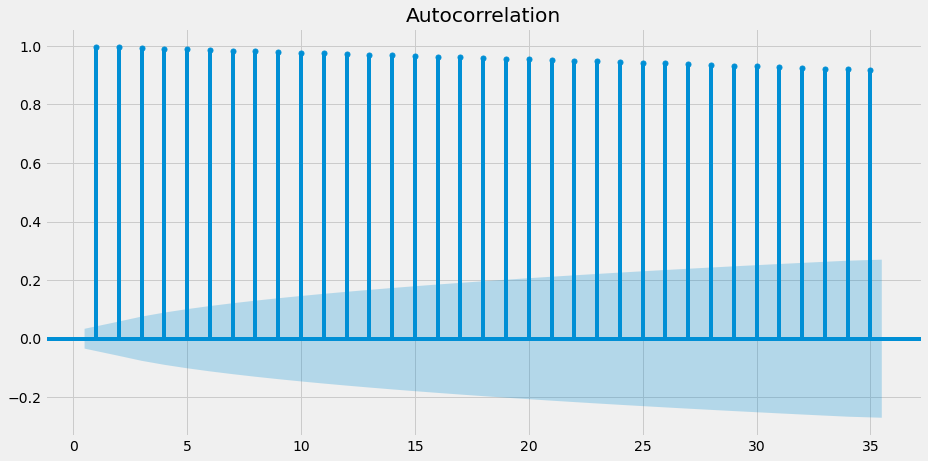

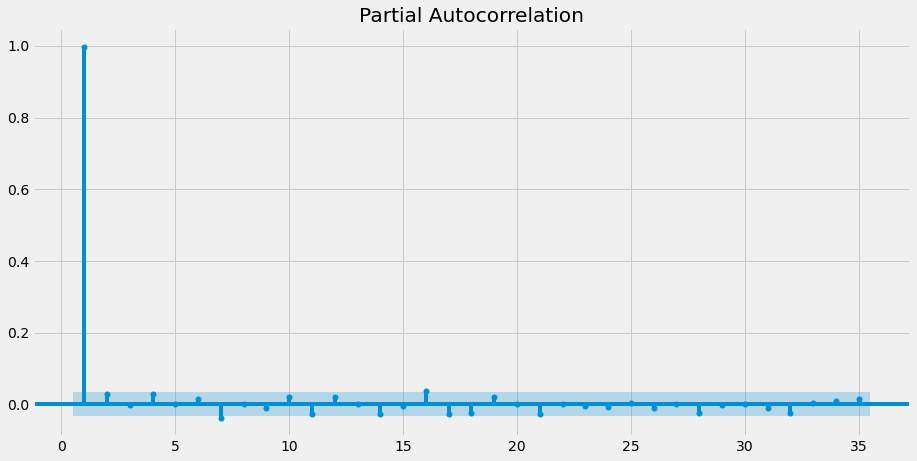

**OKE**

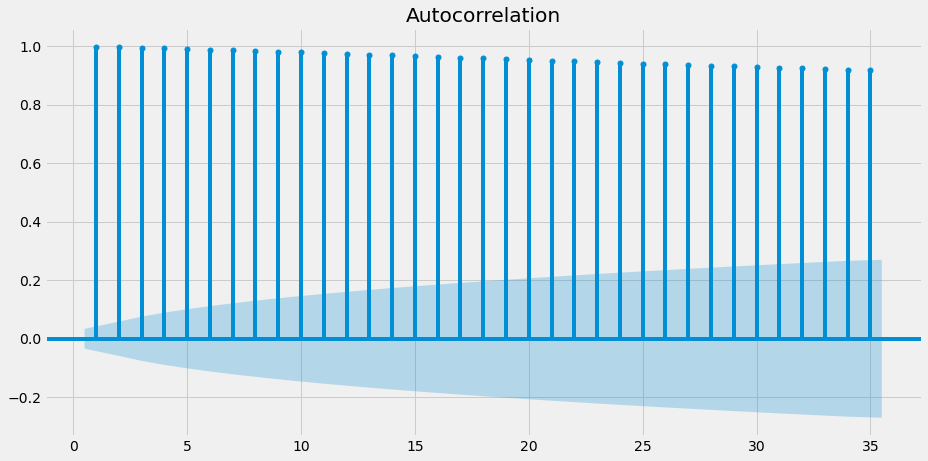

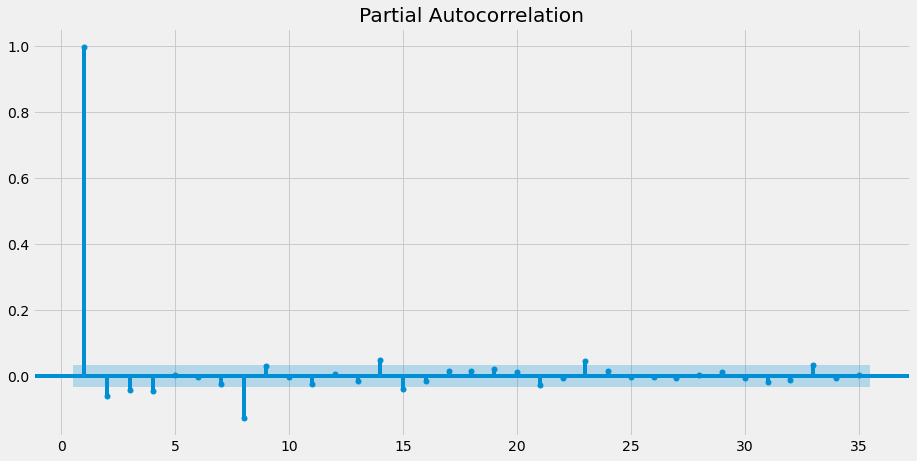

**FARM**

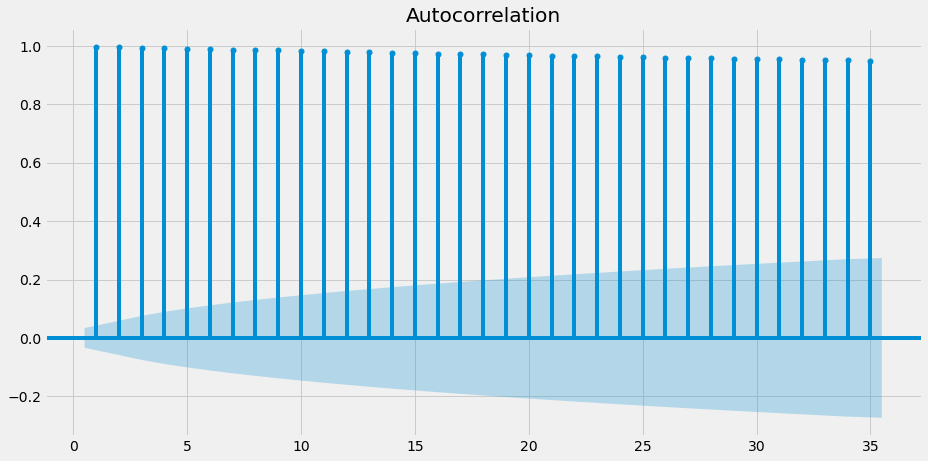

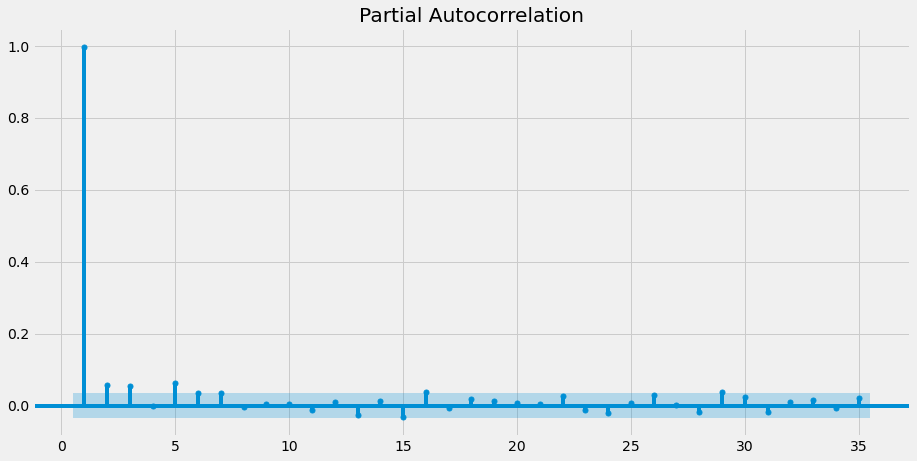

**GLBS**

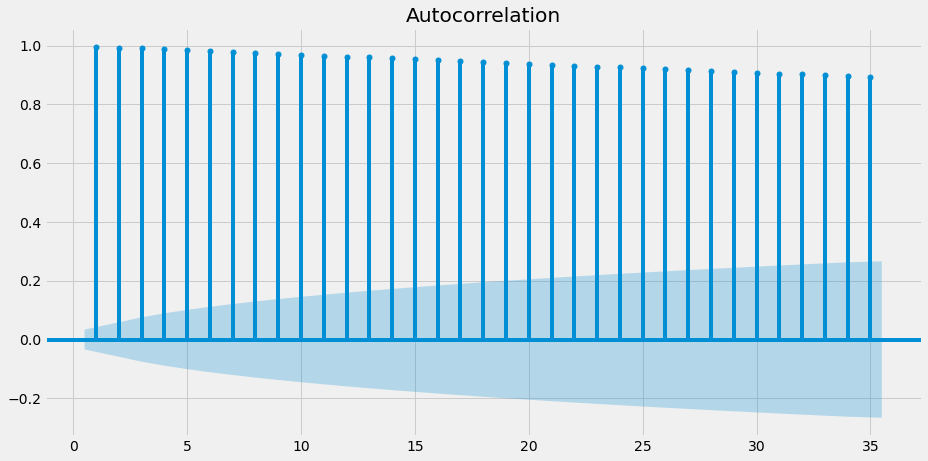

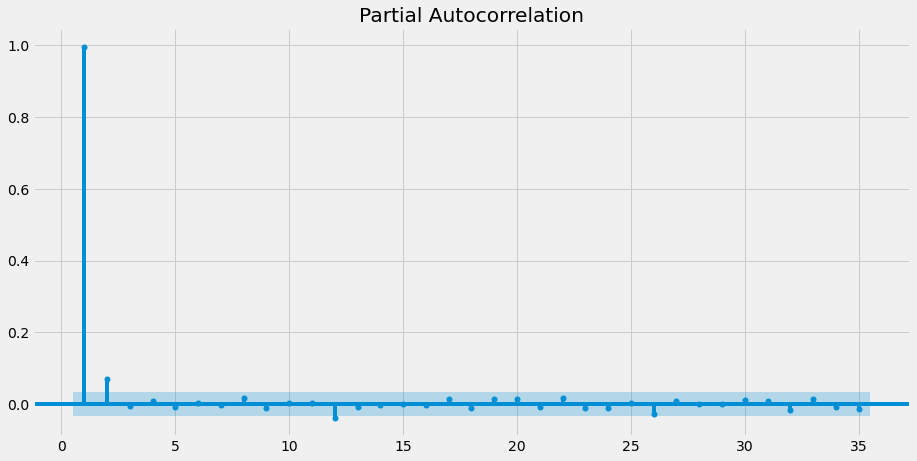

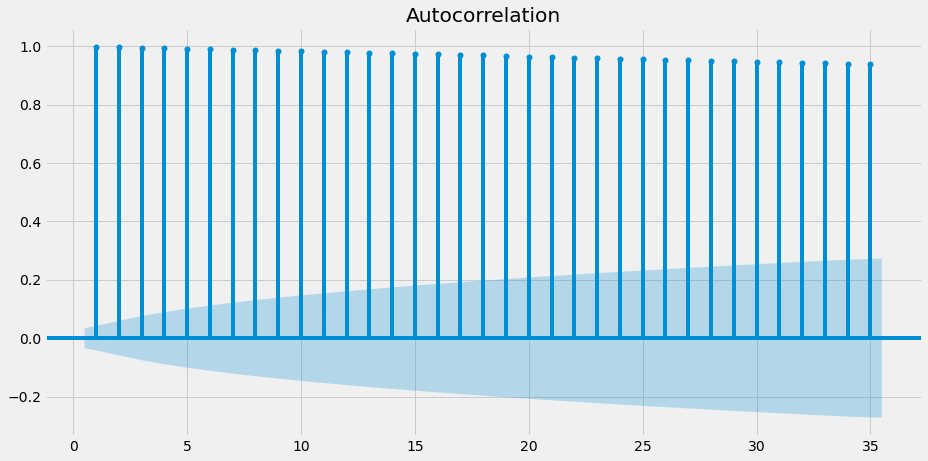

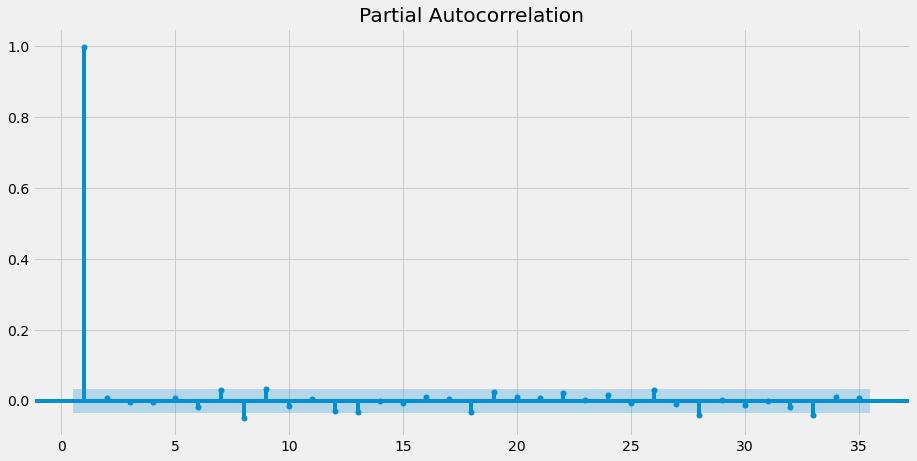

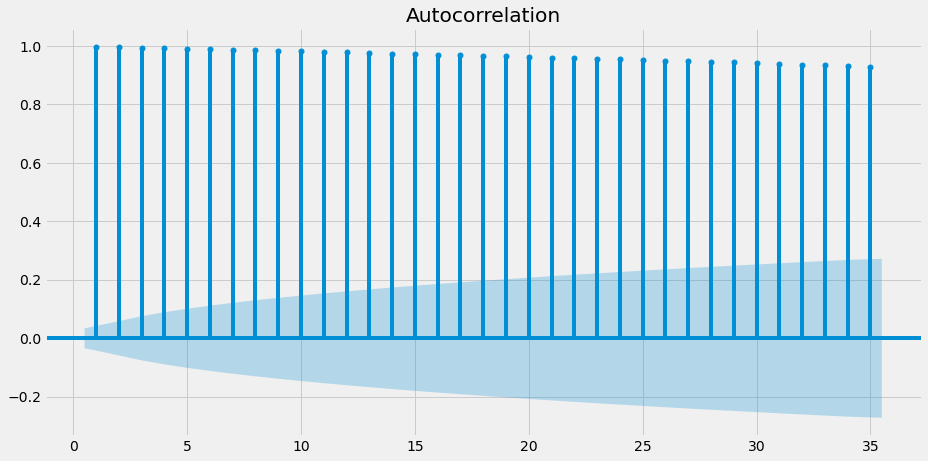

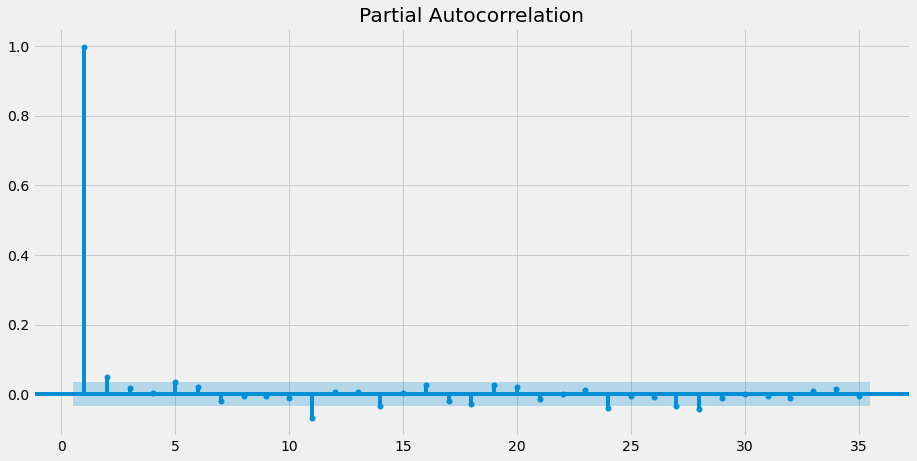

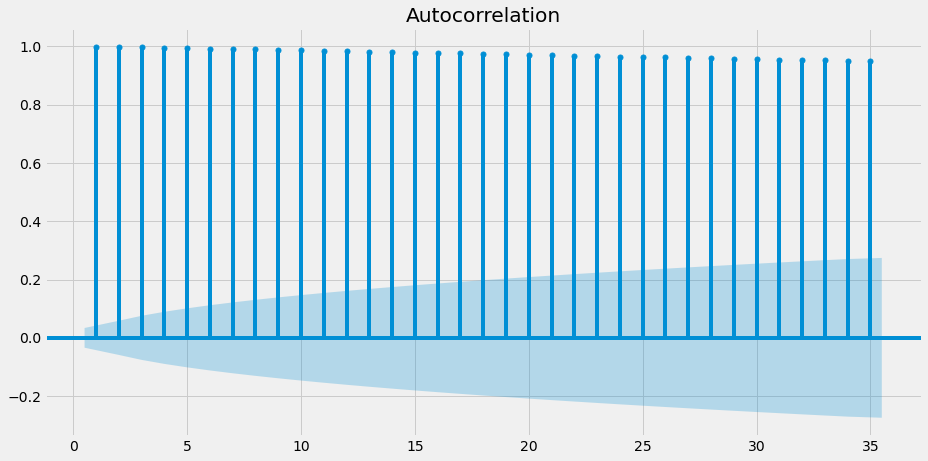

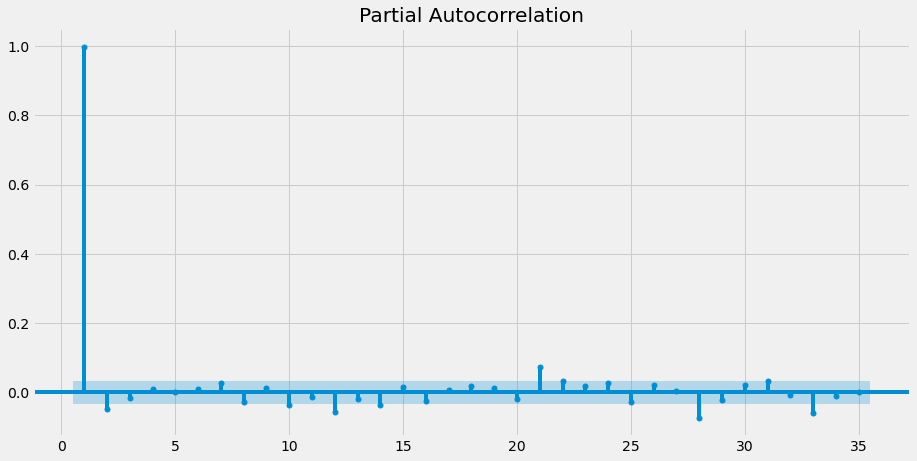

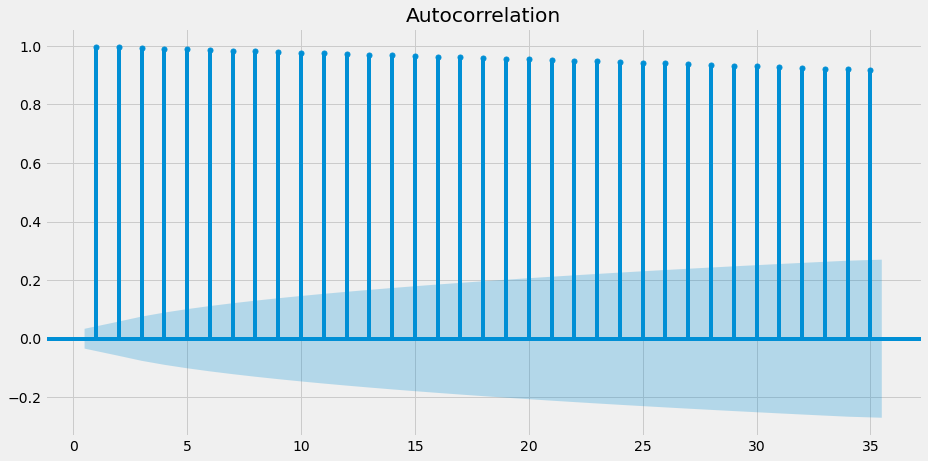

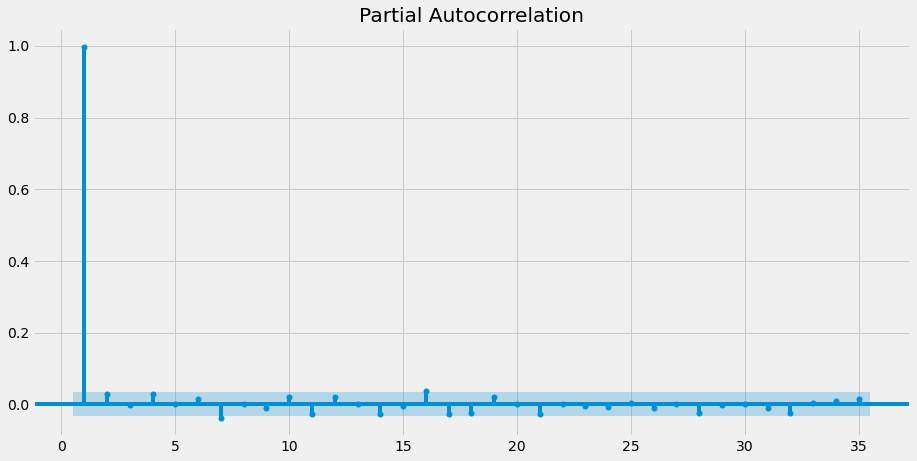

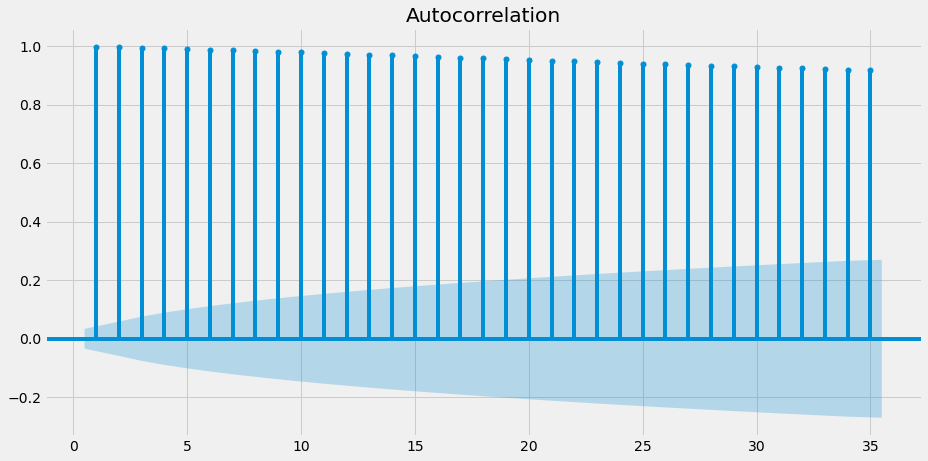

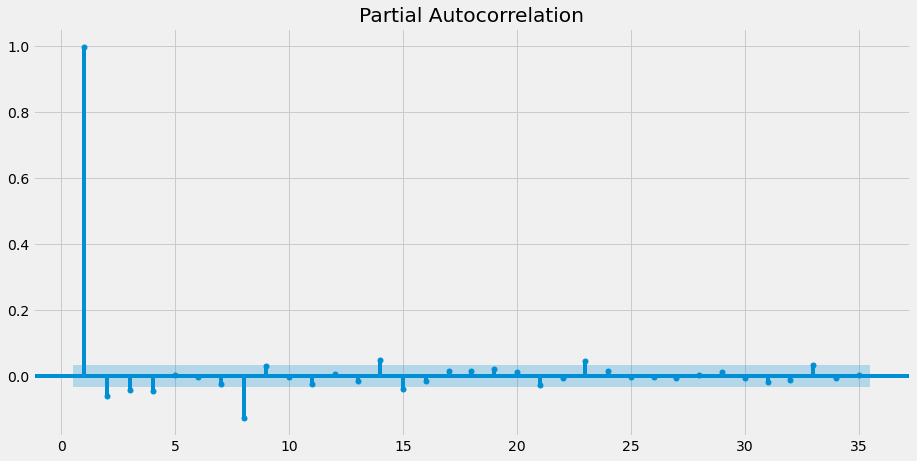

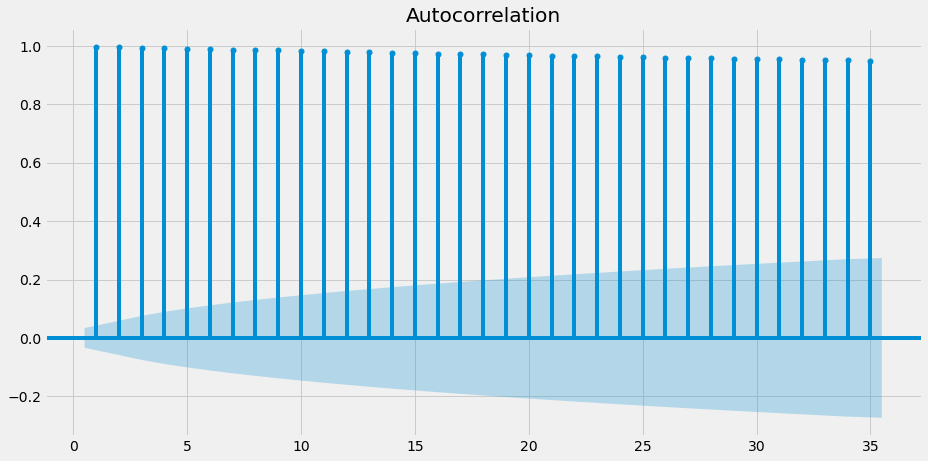

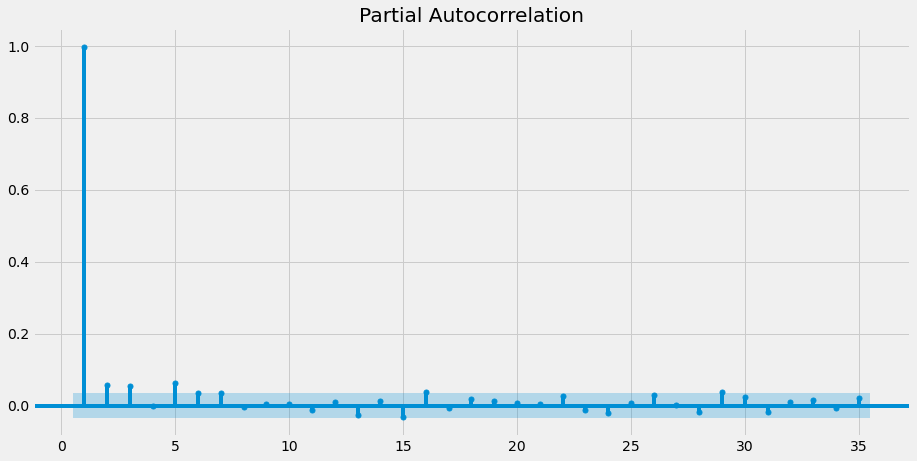

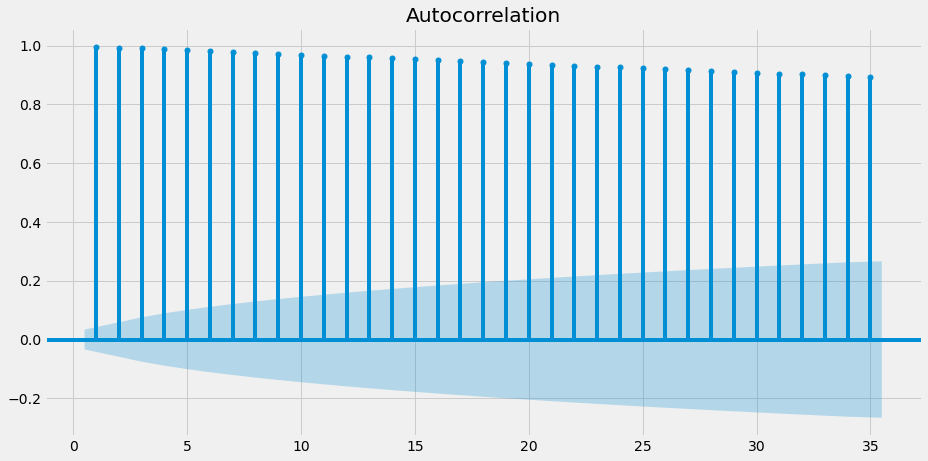

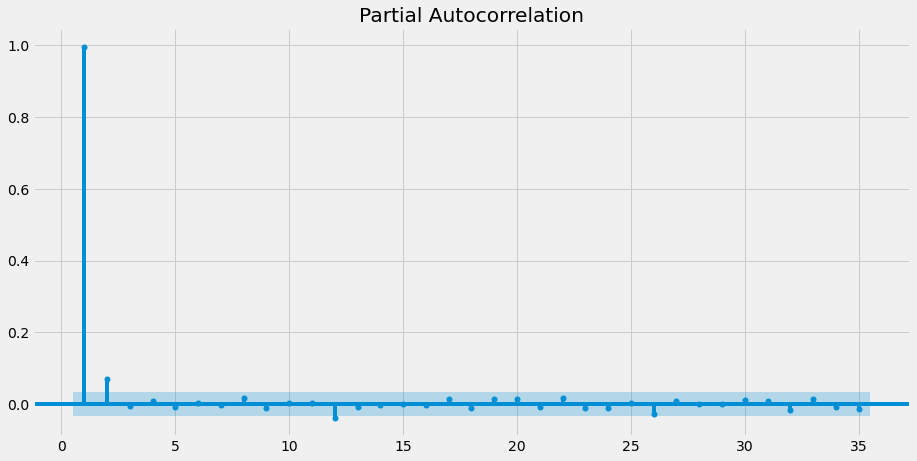

In [63]:
for symbol in df_all_p.columns:
    display(Markdown(f'**{symbol}**'))
    display(plot_acf(df_all_p[symbol], zero=False, lags=35))
    display(plot_pacf(df_all_p[symbol], zero=False, lags=35))

# 7. Time Series Forecasting: AutoRegressive Integrated Moving Average (ARIMA)

In [431]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

## 1. Univariate: Experiment with ARIMA on AAPL

In [423]:
df_all['AAPL']

date
2010-06-29      7.866247
2010-06-30      7.723766
2010-07-01      7.630109
2010-07-02      7.582820
2010-07-06      7.634715
                 ...    
2021-07-01    137.270000
2021-07-02    139.960000
2021-07-06    142.020000
2021-07-07    144.570000
2021-07-08    143.240000
Name: AAPL, Length: 2776, dtype: float64

In [424]:
model = ARIMA(df_all['AAPL'].values, order=(1,1,1))
results = model.fit()

In [425]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2776
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3957.648
Date:                Sun, 01 Aug 2021   AIC                           7921.296
Time:                        20:02:09   BIC                           7939.081
Sample:                             0   HQIC                          7927.718
                               - 2776                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3857      0.058     -6.666      0.000      -0.499      -0.272
ma.L1          0.2823      0.060      4.670      0.000       0.164       0.401
sigma2         1.0146      0.008    127.867      0.000       0.999       1.030
===================================================================================
Ljung-Box (Q):                      170.32   Jarque-Bera (JB):             54764.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              44.05   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

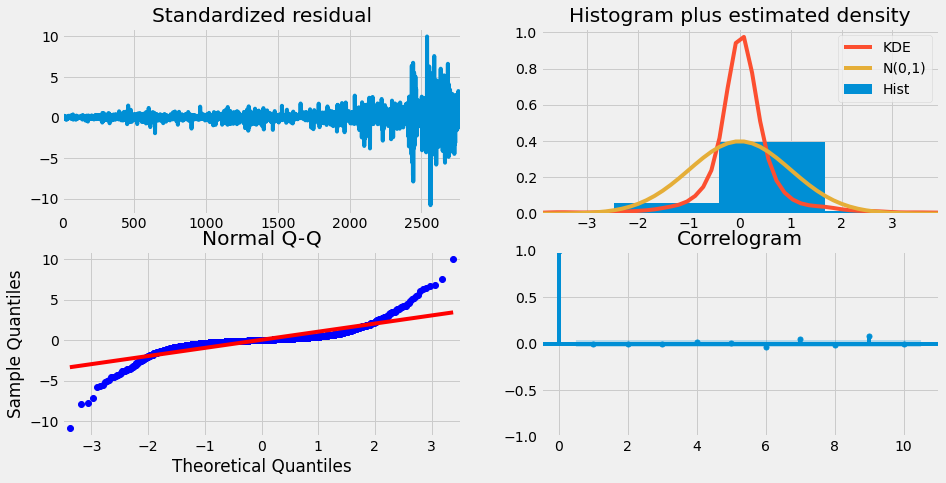

In [426]:
_ = results.plot_diagnostics()

#### First ARIMA Model (pre and during pandemic) - Can we predict early 2021

In [427]:
model = ARIMA(df_all.loc['2019':'2020']['AAPL'].values, order=(1,1,1))
results = model.fit()

In [428]:
df_all.loc['2021': '2021-01-15'].index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', name='date', freq=None)

In [429]:
results.forecast(steps=11)

array([132.40699424, 132.356201  , 132.37475211, 132.36797672,
       132.37045128, 132.3695475 , 132.36987759, 132.36975703,
       132.36980106, 132.36978498, 132.36979086])

In [432]:
actual = df_all.loc['2020-12-31':'2021-01-15']['AAPL']
predicted = results.forecast(steps=11)

In [436]:
ARIMA_1_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_1_R2 = r2_score(actual, predicted)
ARIMA_1_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {ARIMA_1_RMSE}')
print(f'R2 : {ARIMA_1_R2}')
print(f'MAPE : {ARIMA_1_MAPE}')

RMSE : 3.531295603542354
R2 : -2.707079066427085
MAPE : 0.023563749876611473


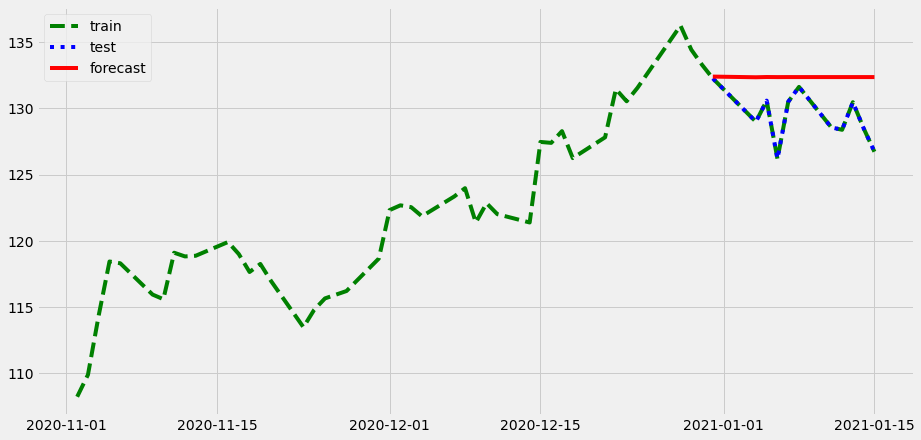

In [437]:
plt.plot(df_all.loc['2020-11-01':'2021-01-15']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2020-12-31':'2021-01-15']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=11), index=df_all.loc['2020-12-31':'2021-01-15'].index), color='red',label='forecast')
plt.legend()
plt.show()

#### Second ARIMA Model - Pre, during, and early post pandemic until March 2021

In [440]:
model = ARIMA(df_all.loc['2019':'2021-03-01']['AAPL'].values, order=(1,1,1))
results = model.fit()

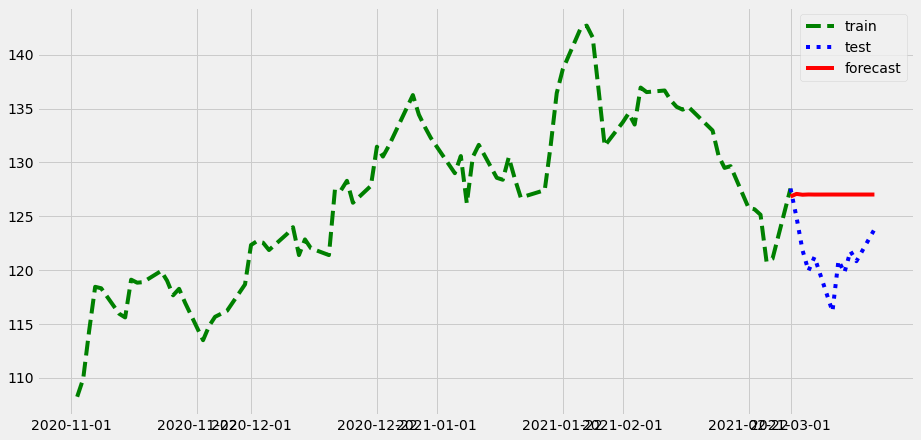

In [441]:
plt.plot(df_all.loc['2020-11-01':'2021-03-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2021-03-01':'2021-03-15']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=11), index=df_all.loc['2021-03-01':'2021-03-15'].index), color='red', label='forecast')
plt.legend()
plt.show()

In [446]:
actual = df_all.loc['2021-03-01':'2021-03-15']['AAPL']
predicted = results.forecast(steps=11)

ARIMA_2_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_2_R2 = r2_score(actual, predicted)
ARIMA_2_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {ARIMA_2_RMSE}')
print(f'R2 : {ARIMA_2_R2}')
print(f'MAPE : {ARIMA_2_MAPE}')

RMSE : 4.080228153848494
R2 : -1.0734583804776348
MAPE : 0.029273362424533742


#### Third ARIMA - Pre, during, and post pandemic until May of 2021

In [443]:
model = ARIMA(df_all.loc['2020':'2021-05-31']['AAPL'].values, order=(1,1,1))
results = model.fit()

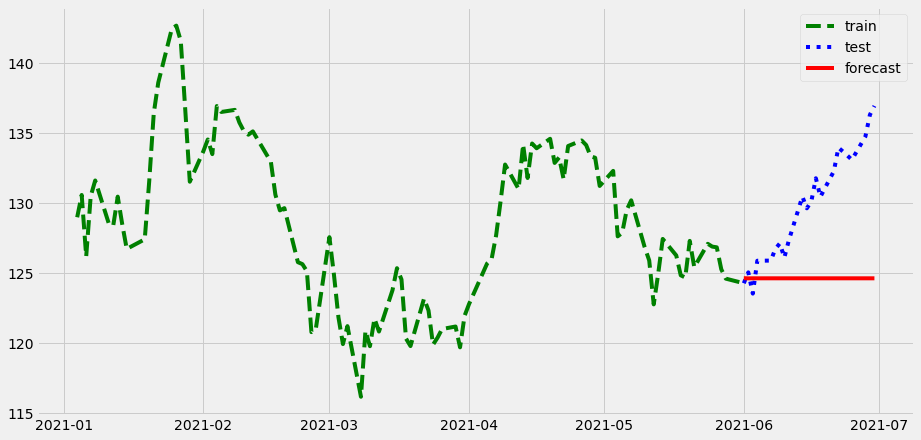

In [444]:
plt.plot(df_all.loc['2021':'2021-06-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2021-06-01':'2021-06-30']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=22), index=df_all.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

In [445]:
actual = df_all.loc['2021-06-01':'2021-06-30']['AAPL']
predicted = results.forecast(steps=22)

ARIMA_3_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_3_R2 = r2_score(actual, predicted)
ARIMA_3_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {ARIMA_3_RMSE}')
print(f'R2 : {ARIMA_3_R2}')
print(f'MAPE : {ARIMA_3_MAPE}')

RMSE : 6.63579999992165
R2 : -1.809462790006151
MAPE : 0.0411563066021127


#### Fourth ARIMA model - More Historical Data starting from 2010

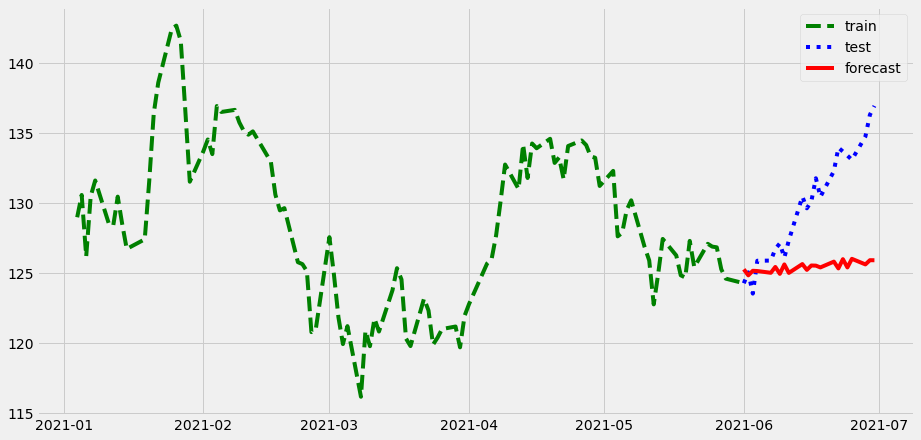

In [453]:
model = ARIMA(df_all.loc[:'2021-05-31']['AAPL'].values, order=(2,2,4))
results = model.fit()

plt.plot(df_all.loc['2021':'2021-06-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(df_all.loc['2021-06-01':'2021-06-30']['AAPL'], color='b', label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(steps=22), index=df_all.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

In [454]:
actual = df_all.loc['2021-06-01':'2021-06-30']['AAPL']
predicted = results.forecast(steps=22)

ARIMA_4_RMSE = np.sqrt(mean_squared_error(actual, predicted))
ARIMA_4_R2 = r2_score(actual, predicted)
ARIMA_4_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {ARIMA_4_RMSE}')
print(f'R2 : {ARIMA_4_R2}')
print(f'MAPE : {ARIMA_4_MAPE}')

RMSE : 5.835365185721147
R2 : -1.1725650474896572
MAPE : 0.035751473799768556


## 2. Multivariate: Experiment with VAR on AAPL

In [455]:
from statsmodels.tsa.api import VAR

In [456]:
rsi_s

TSLA       ZM     MRNA     AMZN     NFLX     NVDA     AAPL  \
date                                                                        
2019-05-17  31.5759  69.8722  47.8012  51.7562  46.2514  34.9121  43.5362   
2019-05-20  30.1196  64.7326  46.4392  50.5560  43.6618  32.2135  38.6997   
2019-05-21  30.0475  65.1242  46.7718  50.3783  46.7132  35.8291  42.6806   
2019-05-22  27.0444  62.2789  44.7253  50.6504  49.2764  34.1713  39.7252   
2019-05-23  28.7203  58.9720  42.9723  45.2996  46.0640  31.5495  37.4931   
...             ...      ...      ...      ...      ...      ...      ...   
2021-07-02  58.1643  64.8314  66.9522  62.1410  62.7262  78.2771  69.0866   
2021-07-06  53.4951  68.2202  66.3052  70.1810  65.5432  79.1398  71.5427   
2021-07-07  50.2161  64.3710  59.1371  71.0010  61.8922  74.3387  74.2123   
2021-07-08  51.9119  60.4380  63.1310  72.3391  58.7390  68.0969  70.5773   
2021-07-09  52.7711  59.9838  63.1380  71.1416  60.8468  68.9597  72.5660   

                GME  
date                 
2019-05-17  39.2945  
2019-05-20  33.2697  
2019-05-21  34.6128  
2019-05-22  32.3600  
2019-05-23  30.5406  
...             ...  
2021-07-02  48.0503  
2021-07-06  47.3222  
2021-07-07  45.3533  
2021-07-08  45.5462  
2021-07-09  45.5110  

[541 rows x 8 columns]

In [465]:
df_rsi = df_all.join(rsi_s, how='inner', rsuffix='_rsi')
df_rsi = df_rsi[['AAPL', 'AAPL_rsi']]
df_rsi.head()

AAPL  AAPL_rsi
date                           
2019-05-17  46.379920   43.5362
2019-05-20  44.929627   38.6997
2019-05-21  45.790969   42.6806
2019-05-22  44.853554   39.7252
2019-05-23  44.087918   37.4931

In [458]:
data = np.log(df_rsi).diff().dropna()

#### VAR model with Log Differencing

In [459]:
model = VAR(data.values)

In [460]:
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Aug, 2021
Time:                     20:16:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.9476
Nobs:                     535.000    HQIC:                  -15.0353
Log likelihood:           2536.77    FPE:                2.79096e-07
AIC:                     -15.0917    Det(Omega_mle):     2.69938e-07
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.002925         0.001053            2.777           0.005
L1.y1        -0.406158         0.115329           -3.522           0.000
L1.y2         0.082096         0.042749            1.920           0.055
L2.y1         0.147658

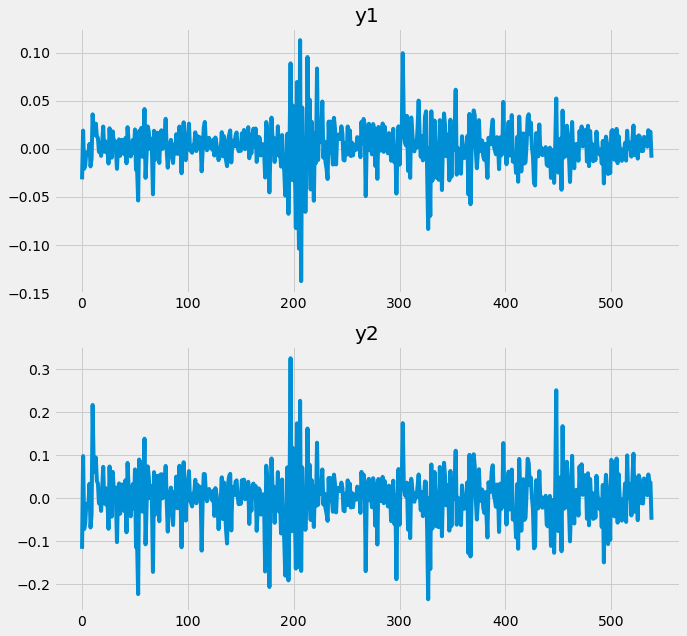

In [461]:
_ = results.plot()

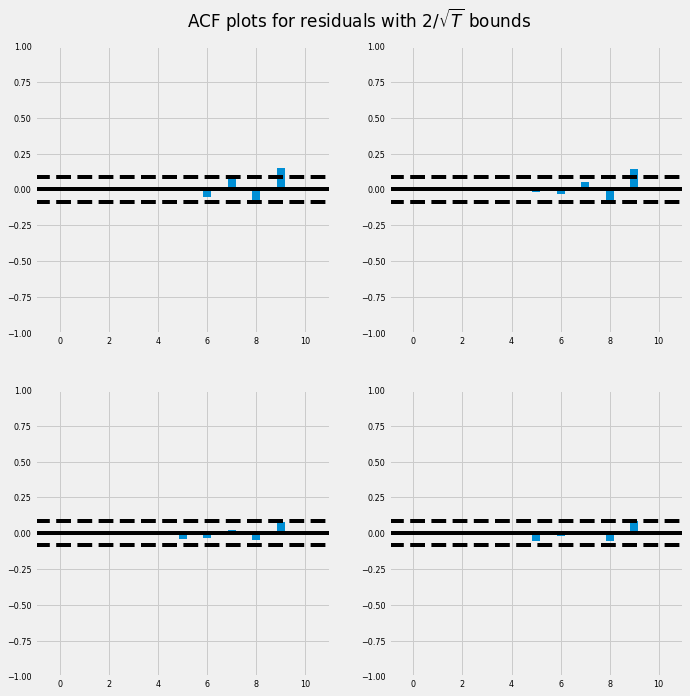

In [462]:
_ = results.plot_acorr()

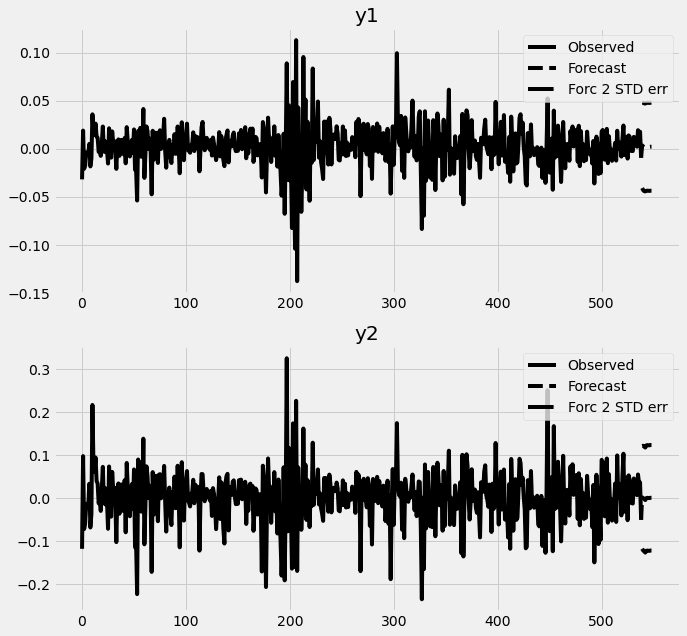

In [463]:
_ = results.plot_forecast(10)

#### VAR without differencing 

In [458]:
model = VAR(df_rsi.values)
results = model.fit(maxlags=4, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Aug, 2021
Time:                     01:19:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.31005
Nobs:                     538.000    HQIC:                   2.26152
Log likelihood:          -2116.74    FPE:                    9.30311
AIC:                      2.23035    Det(Omega_mle):         9.13257
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.141933         0.627364            0.226           0.821
L1.y1         0.791438         0.096807            8.175           0.000
L1.y2         0.051501         0.062778            0.820           0.412
L2.y1         0.207410

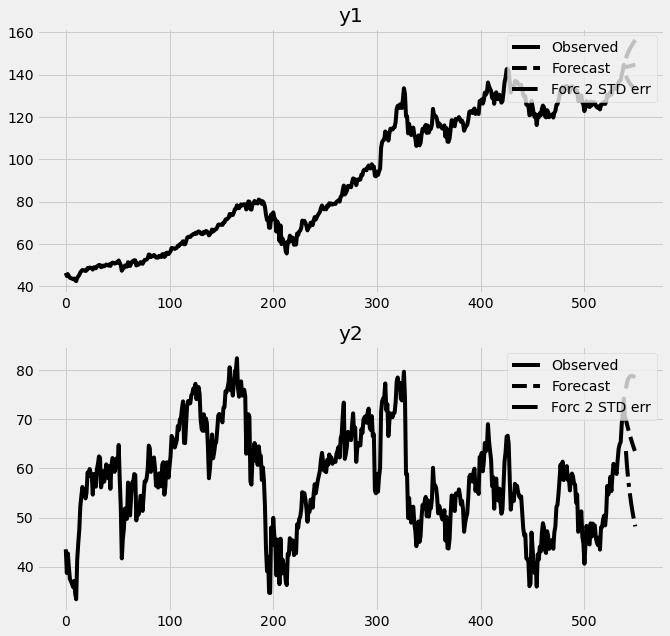

In [459]:
_ = results.plot_forecast(10)

#### VAR Model Forecasting

/Users/tarekatwan/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


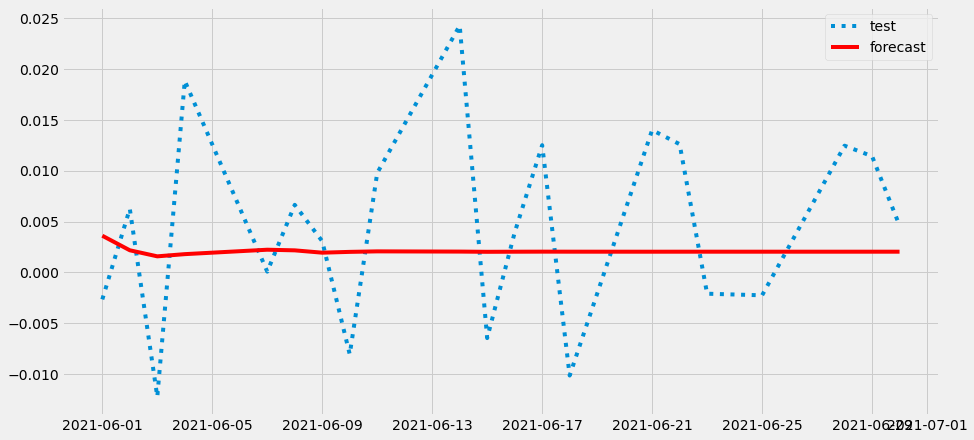

In [493]:
data = np.log(df_rsi.loc[:'2021-05-31']).diff().dropna()
data_plt = np.log(df_rsi).diff().dropna()
model = VAR(data)
results = model.fit(maxlags=4)

lag_order = results.k_ar

#plt.plot(data.loc['2021':'2021-06-01']['AAPL'], color='g', label='train', ls='--')
plt.plot(data_plt.loc['2021-06-01':'2021-06-30']['AAPL'], label='test', ls=':')
plt.plot(pd.DataFrame(results.forecast(data.values[-lag_order:], 22).T[0], index= df_rsi.loc['2021-06-01':'2021-06-30'].index), color='red', label='forecast')
plt.legend()
plt.show()

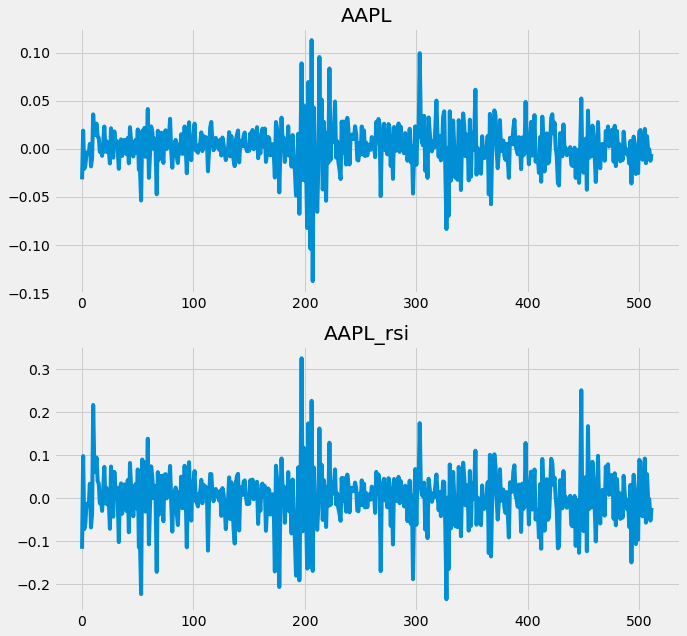

In [496]:

_ = results.plot()

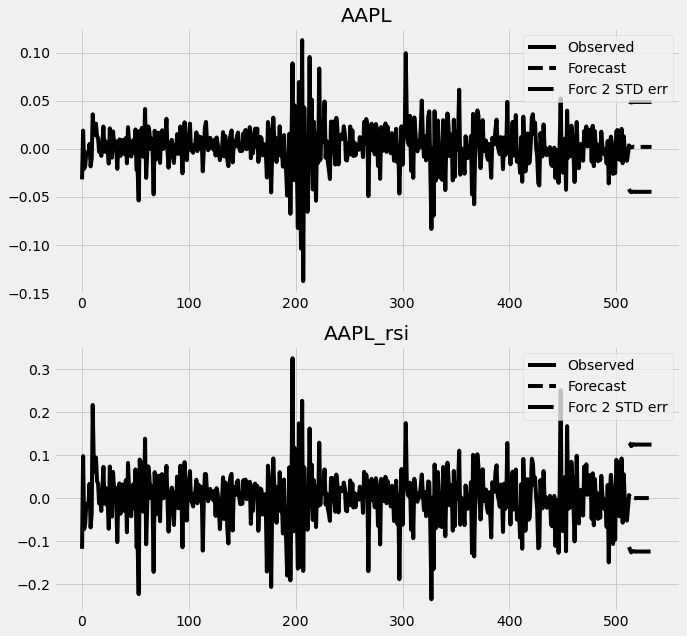

In [497]:
_ = results.plot_forecast(steps=22)

In [500]:
actual = data_plt.loc['2021-06-01':'2021-06-30']['AAPL']
predicted = results.forecast(data.values[-lag_order:], 22).T[0]

VAR_RMSE = np.sqrt(mean_squared_error(actual, predicted))
VAR_R2 = r2_score(actual, predicted)
VAR_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {VAR_RMSE}')
print(f'R2 : {VAR_R2}')
print(f'MAPE : {VAR_MAPE}')

RMSE : 0.009686176563573207
R2 : -0.06257264189441236
MAPE : 2.2607525428695747


# 8. Time Series Forecasting with Facebook Prophet

## 1. Univarite: Experiment with Prophet on AAPL

In [533]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) 
df = df_all['AAPL'].loc[:'2021-01-01'].reset_index().rename(columns={'date':'ds', 'AAPL': 'y'})
m.fit(df)

In [534]:
future = m.make_future_dataframe(periods=175)
future.tail()

ds
2817 2021-06-20
2818 2021-06-21
2819 2021-06-22
2820 2021-06-23
2821 2021-06-24

In [535]:
forecast = m.predict(future)

In [536]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
2817 2021-06-20  128.289011  121.038378  135.814130
2818 2021-06-21  128.234790  121.291866  135.160040
2819 2021-06-22  128.381594  121.460531  136.071440
2820 2021-06-23  128.541578  121.997609  136.204099
2821 2021-06-24  128.632426  121.349239  135.895501

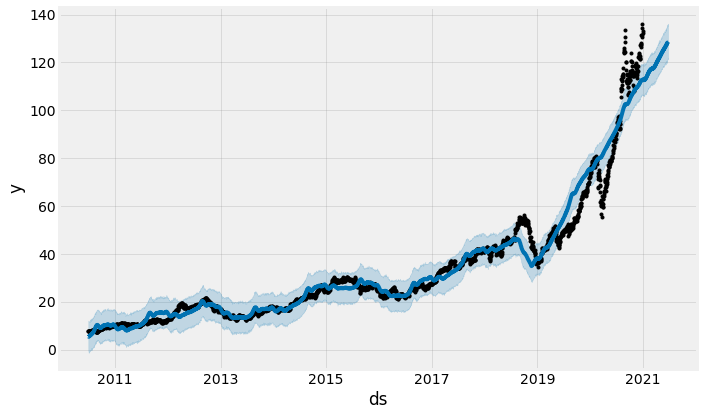

In [537]:
_ = m.plot(forecast)

In [546]:
# remove non trading days
forecast['day'] = forecast['ds'].dt.weekday
forecast = forecast[forecast['day']<=4]

In [558]:
actual = df_all['AAPL'].loc['2021-01-01':'2021-06-24']
predicted = forecast.set_index('ds').loc['2021-01-01':'2021-06-24']['yhat']
# match on dates
combined = actual.to_frame().join(predicted.to_frame(), how='inner')

actual = combined['AAPL']
predicted = combined['yhat']

fb_RMSE = np.sqrt(mean_squared_error(actual, predicted))
fb_R2 = r2_score(actual, predicted)
fb_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {fb_RMSE}')
print(f'R2 : {fb_R2}')
print(f'MAPE : {fb_MAPE}')

RMSE : 11.596775072827167
R2 : -3.6514970006082175
MAPE : 0.06750201696829386


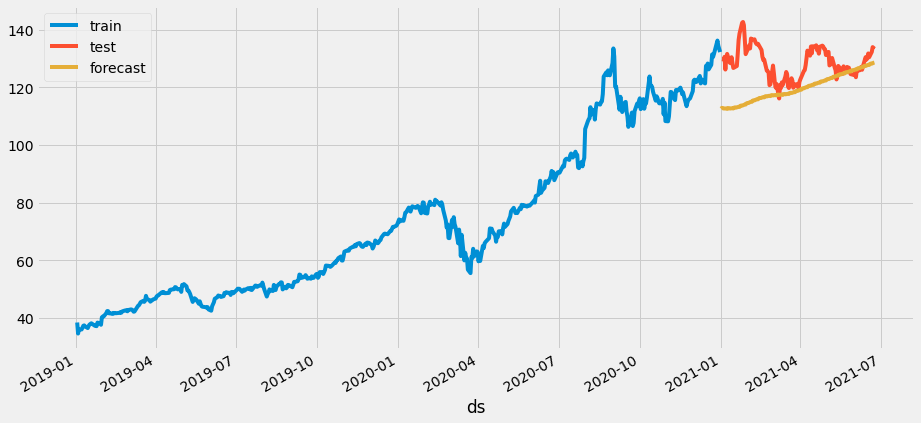

In [541]:
df_all['AAPL'].loc['2019':'2021-01-01'].plot(label='train')
df_all['AAPL'].loc['2021-01-01':'2021-06-24'].plot(label='test')
forecast.set_index('ds').loc['2021-01-01':'2021-06-24']['yhat'].plot(label='forecast')
plt.legend()
plt.show()

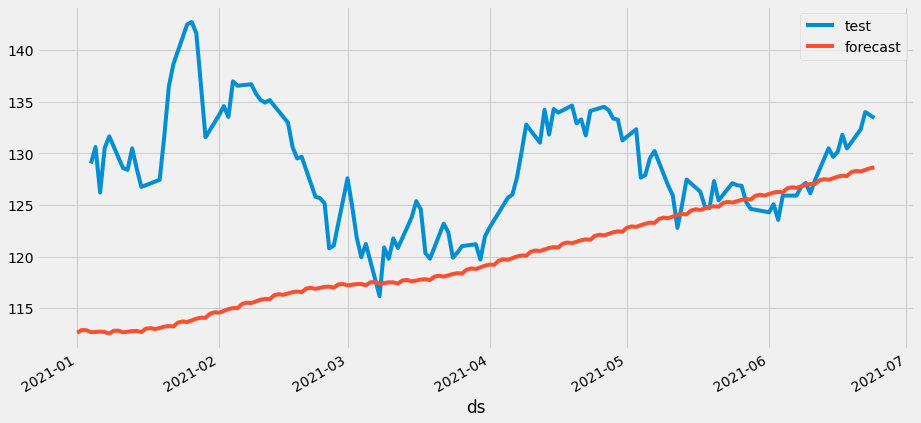

In [542]:
#df_all['AAPL'].loc['2019':'2021-01-01'].plot(label='train')
df_all['AAPL'].loc['2021-01-01':'2021-06-24'].plot(label='test')
forecast.set_index('ds').loc['2021-01-01':'2021-06-24']['yhat'].plot(label='forecast')
plt.legend()
plt.show()

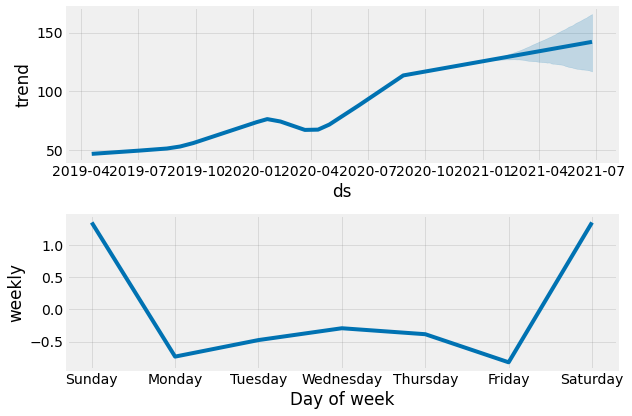

In [473]:
_ = m.plot_components(forecast)

## 2. Multivariate: Experiment with Prophet on AAPL

In [562]:
m = Prophet(daily_seasonality = True) 
df = df_rsi.loc[:'2021-01-01'].reset_index().rename(columns={'date':'ds', 'AAPL': 'y', 'AAPL_rsi': 'rsi'})
df.tail()

ds           y      rsi
406 2020-12-24  131.550212  64.5447
407 2020-12-28  136.255198  68.9975
408 2020-12-29  134.440987  65.6509
409 2020-12-30  133.294645  63.5992
410 2020-12-31  132.267922  61.7789

In [563]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [564]:
future = m.make_future_dataframe(periods=175)

In [565]:
forecast = m.predict(future)

In [566]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
581 2021-06-20  142.354688  119.182000  164.936316
582 2021-06-21  141.973085  117.786371  163.908107
583 2021-06-22  142.385149  118.333140  165.318894
584 2021-06-23  142.637162  119.043259  165.401136
585 2021-06-24  142.610373  118.102956  165.539525

In [479]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

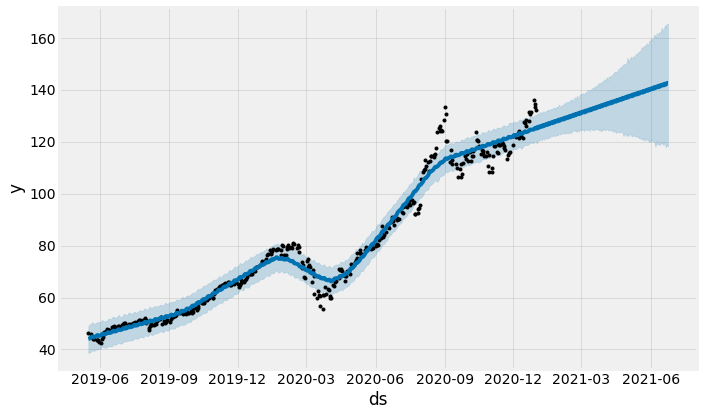

In [567]:
_ = m.plot(forecast)

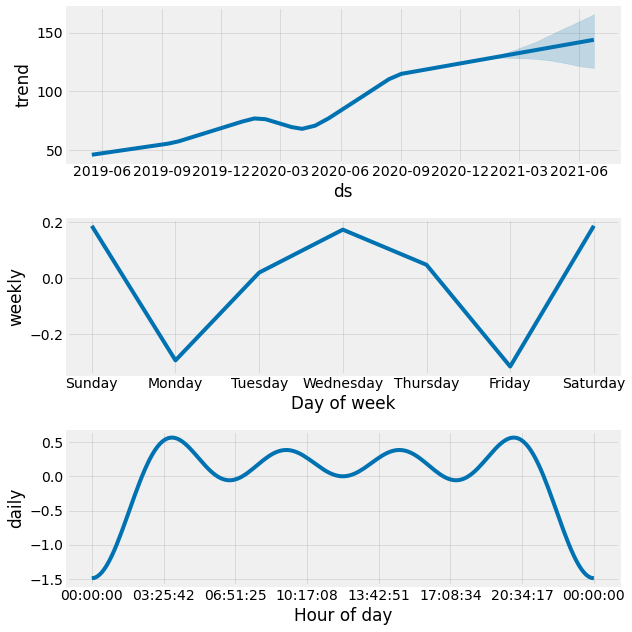

In [568]:
_ = m.plot_components(forecast)

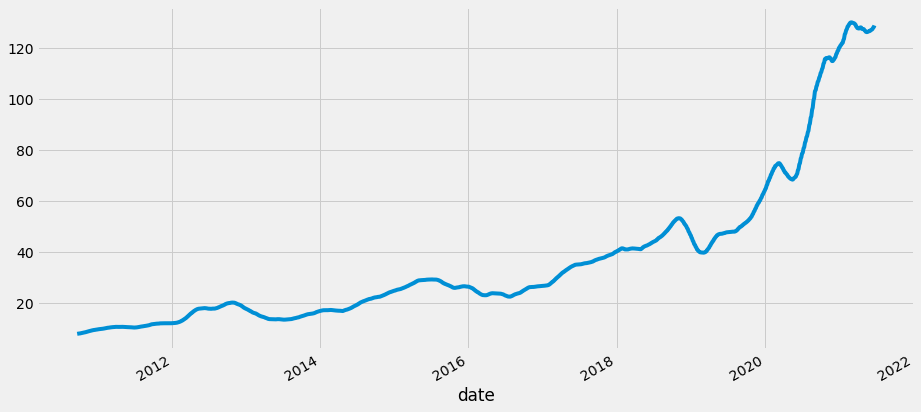

In [569]:
_ = df_all['AAPL'].loc[:'2021-06-24'].rolling(window=60).mean().plot()

In [571]:
# remove non trading days
forecast['day'] = forecast['ds'].dt.weekday
forecast = forecast[forecast['day']<=4]

actual = df_all['AAPL'].loc['2021-01-01':'2021-06-24']
predicted = forecast.set_index('ds').loc['2021-01-01':'2021-06-24']['yhat']
# match on dates
combined = actual.to_frame().join(predicted.to_frame(), how='inner')

actual = combined['AAPL']
predicted = combined['yhat']

fb_2_RMSE = np.sqrt(mean_squared_error(actual, predicted))
fb_2_R2 = r2_score(actual, predicted)
fb_2_MAPE = mean_absolute_percentage_error(actual, predicted)
print(f'RMSE : {fb_2_RMSE}')
print(f'R2 : {fb_2_R2}')
print(f'MAPE : {fb_2_MAPE}')

RMSE : 9.63316909125354
R2 : -2.2096423719187968
MAPE : 0.06657781559736414


## 3. Additional Regressor
> Additional regressors can be added to the linear part of the model using the add_regressor method or function. A column with the regressor value will need to be present in both the fitting and prediction dataframes

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


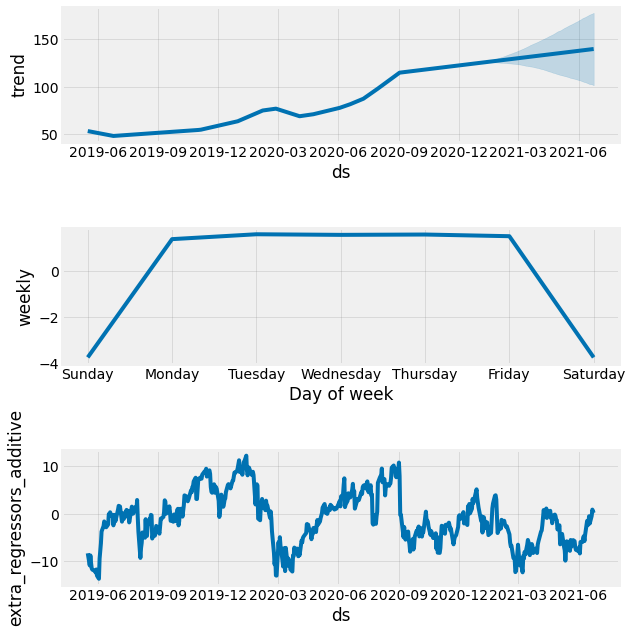

In [483]:
df = df_all['AAPL'].loc['2019':'2021-01-01'].reset_index().rename(columns={'date':'ds', 'AAPL': 'y'})
df['rsi'] = df.set_index('ds').join(df_rsi, how='left')['AAPL_rsi'].values
df.dropna(inplace=True)
m = Prophet()
m.add_regressor('rsi')
m.fit(df)

future = m.make_future_dataframe(periods=175)
future['rsi'] = future.set_index('ds').join(df_rsi, how='left')['AAPL_rsi'].values
future.dropna(inplace=True)

forecast = m.predict(future)
fig = m.plot_components(forecast)

In [484]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
526 2021-06-18  138.344238  103.637188  175.063305
527 2021-06-21  140.064647  102.963237  176.920280
528 2021-06-22  141.702930  103.770252  179.859365
529 2021-06-23  141.419332  103.315671  179.488948
530 2021-06-24  141.154088  103.277168  180.307197

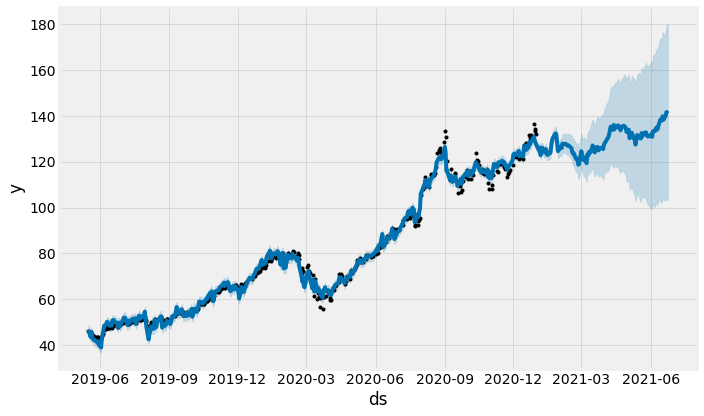

In [485]:
_ = m.plot(forecast)

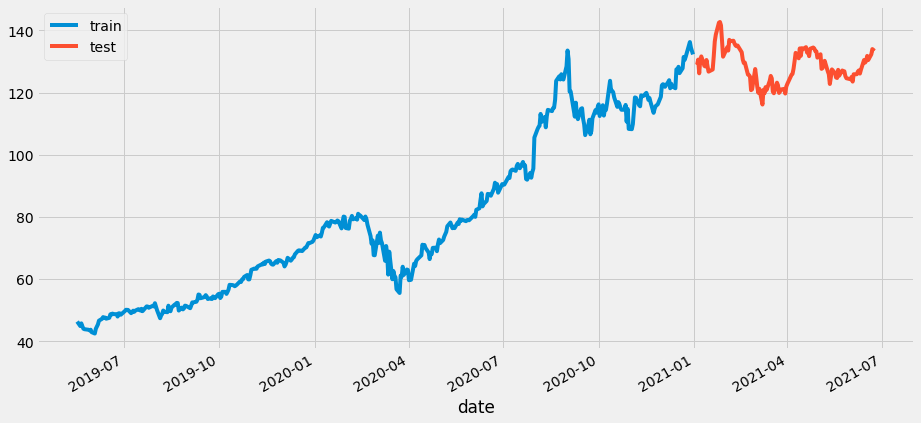

In [486]:
df_rsi['AAPL'].loc['2019':'2021-01-01'].plot(label='train')
df_rsi['AAPL'].loc['2021-01-01':'2021-06-24'].plot(label='test')
plt.legend()
plt.show()

# Store Benchmark Metrics for LSTM comparison

In [572]:
metrics = {
    'fb_1' : [fb_RMSE, fb_R2, fb_MAPE],
    'fb_2' : [fb_2_RMSE, fb_2_R2, fb_2_MAPE],
    'ARIMA_1': [ARIMA_1_RMSE, ARIMA_1_R2, ARIMA_1_MAPE],
    'ARIMA_2': [ARIMA_2_RMSE, ARIMA_2_R2, ARIMA_2_MAPE],
    'ARIMA_3': [ARIMA_3_RMSE, ARIMA_3_R2, ARIMA_3_MAPE],
    'ARIMA_4': [ARIMA_4_RMSE, ARIMA_4_R2, ARIMA_4_MAPE],
    'VAR_1' : [VAR_RMSE, VAR_R2, VAR_MAPE]
}

In [576]:
metrics_df = pd.DataFrame(metrics, index=['RMSE', 'R2', 'MAPE'])
metrics_df.to_pickle('metrics_df.pickle')

In [577]:
metrics_df

fb_1      fb_2   ARIMA_1   ARIMA_2   ARIMA_3   ARIMA_4     VAR_1
RMSE  11.596775  9.633169  3.531296  4.080228  6.635800  5.835365  0.009686
R2    -3.651497 -2.209642 -2.707079 -1.073458 -1.809463 -1.172565 -0.062573
MAPE   0.067502  0.066578  0.023564  0.029273  0.041156  0.035751  2.260753

# 9. Time Series Forecasting with LSTM 

In [291]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [292]:
tf.__version__

'2.5.0'

In [360]:
df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close], axis=1).dropna()

**Sliding Window function for experimenting with different windows**

In [361]:
def sliding_window(df, window):
    x = []
    y = []
    for i in range(len(df)-window):
        feature = df.iloc[i: (i+window)]
        target = df.iloc[(i+window)]
        x.append(feature)
        y.append(target)
    return np.array(x), np.array(y).reshape(-1,1)

In [362]:
# 5 day window for AAPL
window = 5
x, y = sliding_window(df_all['AAPL'], window)

In [363]:
x[:5]

array([[49.8319139 , 49.99568994, 50.71679337, 50.63857198, 50.17902132],
       [49.99568994, 50.71679337, 50.63857198, 50.17902132, 49.93946831],
       [50.71679337, 50.63857198, 50.17902132, 49.93946831, 50.01524528],
       [50.63857198, 50.17902132, 49.93946831, 50.01524528, 49.05214443],
       [50.17902132, 49.93946831, 50.01524528, 49.05214443, 51.45989657]])

In [364]:
y[:5]

array([[49.93946831],
       [50.01524528],
       [49.05214443],
       [51.45989657],
       [51.12501125]])

**Splitting the Data into Train and Test**

In [365]:
split_1 = int(0.85 * len(x))
train_x = x[:split_1]
x_test = x[split_1:]
train_y = y[:split_1]
y_test = y[split_1:]

In [366]:
split_2 = int(0.90 * len(train_x))
x_train = train_x[:split_2]
x_val = train_x[split_2:]
y_train = train_y[:split_2]
y_val = train_y[split_2:]

In [367]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(423, 5)
(84, 5)
(48, 5)


### Scaling Data

In [368]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
y_val = scaler.transform(y_val)

In [369]:
# reshape features for LSTM
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))
x_val = x_val.reshape(x_val.shape + (1,))

In [370]:
x_train.shape

(423, 5, 1)

In [371]:
x_train[0:5]

array([[[0.0729178 ],
        [0.07455266],
        [0.08175093],
        [0.0809701 ],
        [0.07498642]],

       [[0.07455266],
        [0.08175093],
        [0.0809701 ],
        [0.07638273],
        [0.07263885]],

       [[0.08175093],
        [0.0809701 ],
        [0.07638273],
        [0.07399144],
        [0.07338145]],

       [[0.0809701 ],
        [0.07638273],
        [0.07399144],
        [0.07474787],
        [0.06394324]],

       [[0.07638273],
        [0.07399144],
        [0.07474787],
        [0.06513392],
        [0.08753876]]])

### Building our LSTM Network

In [372]:
from tensorflow.keras.utils import plot_model

model = Sequential()
dropout = 0.2

model.add(
    LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu')
)
model.add(Dropout(dropout))
model.add(
    LSTM(units=10, return_sequences=True, activation='relu')
)
model.add(Dropout(dropout))
model.add(
    LSTM(units=10, activation='relu')
)
model.add(Dropout(dropout))
model.add(Dense(y_train.shape[1]))

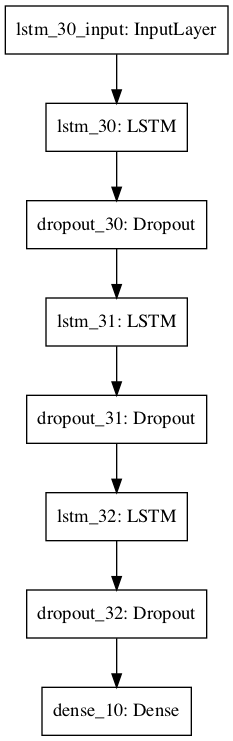

In [373]:
plot_model(model)

In [374]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 5, 10)             480       
_________________________________________________________________
dropout_30 (Dropout)         (None, 5, 10)             0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 5, 10)             840       
_________________________________________________________________
dropout_31 (Dropout)         (None, 5, 10)             0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_32 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)               

### Compiling the LSTM Model

In [375]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(), 
              metrics=[tf.keras.losses.MeanAbsolutePercentageError(), 
                                     tf.keras.losses.MeanSquaredError()])

### Fitting our LSTM 

In [376]:
x_train.dtype

dtype('float64')

In [377]:
history = model.fit(
            x_train, 
            y_train,
            epochs = 30,
            shuffle=False,
            validation_data=(x_val, y_val),
            batch_size=1,
            verbose=1
        )

Epoch 1/30
423/423 [==============================] - 5s 7ms/step - loss: 0.0133 - mean_absolute_percentage_error: 46233.5781 - mean_squared_error: 0.0133 - val_loss: 0.0138 - val_mean_absolute_percentage_error: 12.0925 - val_mean_squared_error: 0.0138
Epoch 2/30
423/423 [==============================] - 2s 5ms/step - loss: 0.0359 - mean_absolute_percentage_error: 928896.0000 - mean_squared_error: 0.0359 - val_loss: 0.0078 - val_mean_absolute_percentage_error: 8.5578 - val_mean_squared_error: 0.0078
Epoch 3/30
423/423 [==============================] - 2s 5ms/step - loss: 0.0289 - mean_absolute_percentage_error: 906747.6250 - mean_squared_error: 0.0289 - val_loss: 0.0153 - val_mean_absolute_percentage_error: 13.0408 - val_mean_squared_error: 0.0153
Epoch 4/30
423/423 [==============================] - 2s 5ms/step - loss: 0.0223 - mean_absolute_percentage_error: 717830.0000 - mean_squared_error: 0.0223 - val_loss: 0.0102 - val_mean_absolute_percentage_error: 10.1060 - val_mean_squared_

### Observed Training Scores and Metrics

In [378]:
training_results = pd.DataFrame(history.history)

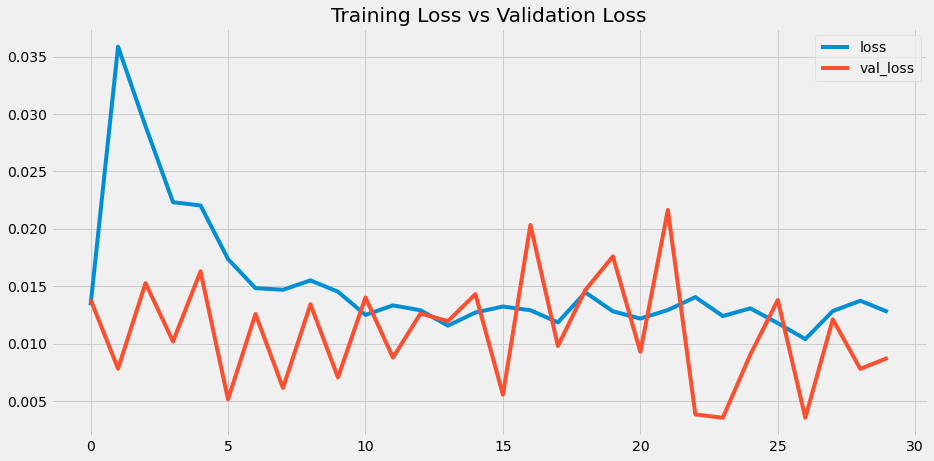

In [379]:
_ = training_results[['loss', 'val_loss']].plot(title='Training Loss vs Validation Loss')

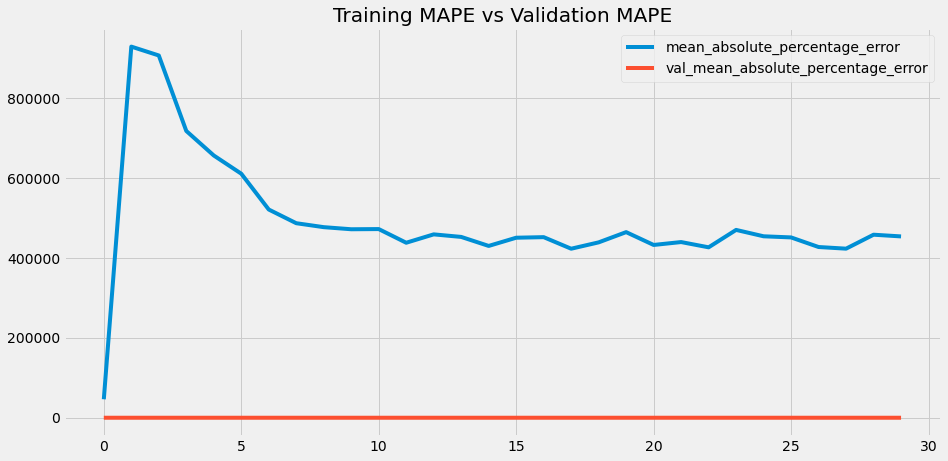

In [380]:
_ = training_results[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(title='Training MAPE vs Validation MAPE')

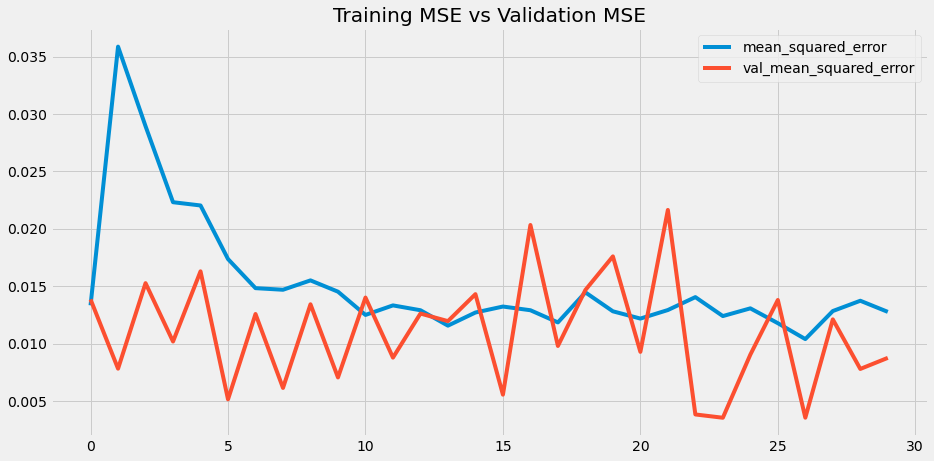

In [381]:
_ = training_results[['mean_squared_error', 'val_mean_squared_error']].plot(title='Training MSE vs Validation MSE')

### Evaluate LSTM Model

In [382]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 1s 5ms/step - loss: 0.0067 - mean_absolute_percentage_error: 8.4405 - mean_squared_error: 0.0077


[0.00668686768040061, 8.440478324890137, 0.007709176745265722]

In [383]:
training_results.tail(1)

loss  mean_absolute_percentage_error  mean_squared_error  val_loss  \
29  0.01276                        453854.0             0.01276  0.008753   

    val_mean_absolute_percentage_error  val_mean_squared_error  
29                            8.927392                0.008753

### LSTM Prediction

In [384]:
predicted = model.predict(x_test)

In [385]:
y_train.shape

(423, 1)

In [386]:
predicted.shape

(84, 1)

In [387]:
df_all['AAPL'].index[-len(y_test): ].shape

(84,)

In [388]:
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [389]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": y_test.reshape(-1,1).ravel(),
    "Predicted": predicted.ravel()
    }, index = df_all['AAPL'].index[-len(y_test): ])
stocks.head()

Real   Predicted
date                              
2021-03-10  119.777626  119.576530
2021-03-11  121.754287  119.263626
2021-03-12  120.825855  119.233582
2021-03-15  123.780863  119.017212
2021-03-16  125.358198  119.695808

<AxesSubplot:xlabel='date'>

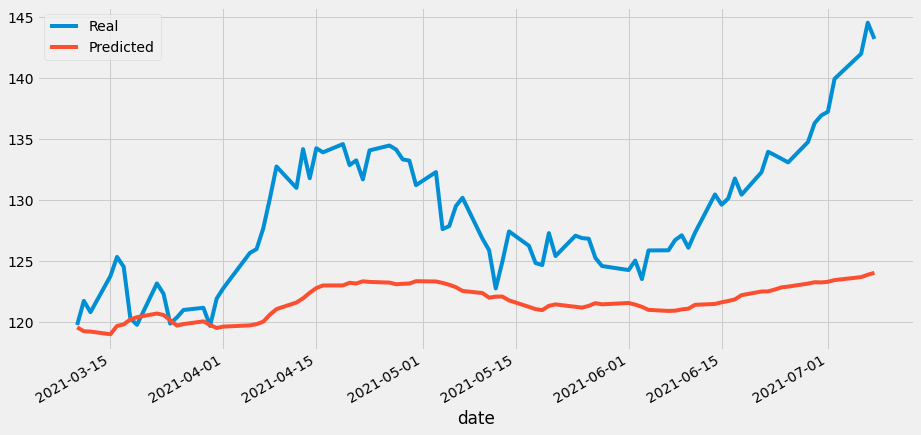

In [390]:
stocks.plot()

## LSTM Trained on Longer period

In [413]:
# 5 day window for AAPL
def train_lstm(window, df, units):
    
    x, y = sliding_window(df['AAPL'], window)

    split_1 = int(0.85 * len(x))
    train_x = x[:split_1]
    x_test = x[split_1:]
    train_y = y[:split_1]
    y_test = y[split_1:]

    split_2 = int(0.90 * len(train_x))
    x_train = train_x[:split_2]
    x_val = train_x[split_2:]
    y_train = train_y[:split_2]
    y_val = train_y[split_2:]

    # Use the MinMaxScaler to scale data between 0 and 1.
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler()
    scaler.fit(x)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    x_val = scaler.transform(x_val)
    scaler.fit(y)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)
    y_val = scaler.transform(y_val)

    # reshape features for LSTM
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.reshape(x_test.shape + (1,))
    x_val = x_val.reshape(x_val.shape + (1,))

    model = Sequential()
    dropout = 0.2

    model.add(
        LSTM(units=units, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='relu')
    )
    model.add(Dropout(dropout))
    model.add(
        LSTM(units=units, return_sequences=True, activation='relu')
    )
    model.add(Dropout(dropout))
    model.add(
        LSTM(units=units, activation='relu')
    )
    model.add(Dropout(dropout))
    model.add(Dense(y_train.shape[1]))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.MeanSquaredError(), 
                  metrics=[tf.keras.losses.MeanAbsolutePercentageError(), 
                                         tf.keras.losses.MeanSquaredError()])
    return model, (x_train, y_train, x_test, y_test, x_val, y_val)

In [414]:
df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close if i[0] not in ['ZM', 'MRNA']], axis=1).dropna()
model, data = train_lstm(window=5, df=df_all, units=10)

In [415]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 5, 10)             480       
_________________________________________________________________
dropout_42 (Dropout)         (None, 5, 10)             0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 5, 10)             840       
_________________________________________________________________
dropout_43 (Dropout)         (None, 5, 10)             0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_44 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)               

In [416]:
x_train, y_train, x_test, y_test, x_val, y_val = data

In [418]:
history = model.fit(
            x_train, 
            y_train,
            epochs = 30,
            shuffle=False,
            validation_data=(x_val, y_val),
            batch_size=20,
            verbose=1
        )

Epoch 1/30
106/106 [==============================] - 4s 13ms/step - loss: 0.0021 - mean_absolute_percentage_error: 1520.6400 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_absolute_percentage_error: 13.7613 - val_mean_squared_error: 0.0027
Epoch 2/30
106/106 [==============================] - 1s 7ms/step - loss: 0.0112 - mean_absolute_percentage_error: 88504.8281 - mean_squared_error: 0.0112 - val_loss: 0.0149 - val_mean_absolute_percentage_error: 36.8056 - val_mean_squared_error: 0.0154
Epoch 3/30
106/106 [==============================] - 1s 7ms/step - loss: 0.0086 - mean_absolute_percentage_error: 72102.7734 - mean_squared_error: 0.0086 - val_loss: 0.0150 - val_mean_absolute_percentage_error: 36.9239 - val_mean_squared_error: 0.0155
Epoch 4/30
106/106 [==============================] - 1s 7ms/step - loss: 0.0083 - mean_absolute_percentage_error: 77723.1406 - mean_squared_error: 0.0083 - val_loss: 0.0151 - val_mean_absolute_percentage_error: 37.2684 - val_mean_squared_er

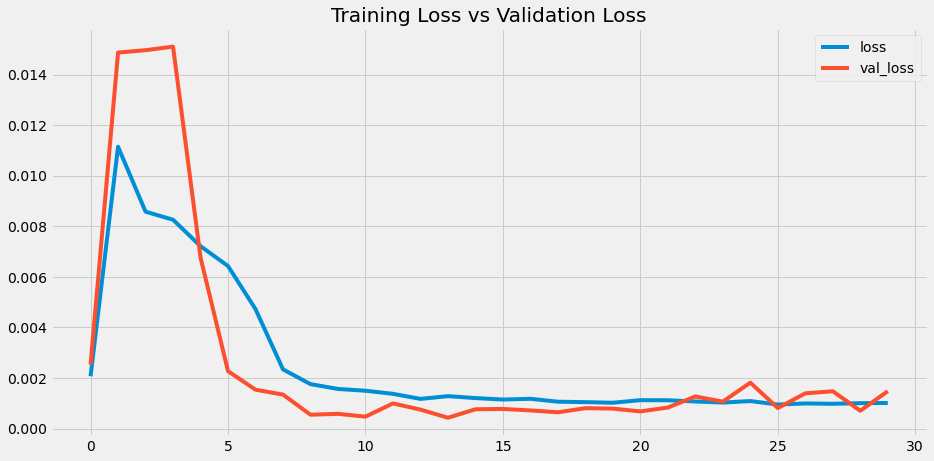

In [419]:
training_results = pd.DataFrame(history.history)
_ = training_results[['loss', 'val_loss']].plot(title='Training Loss vs Validation Loss')

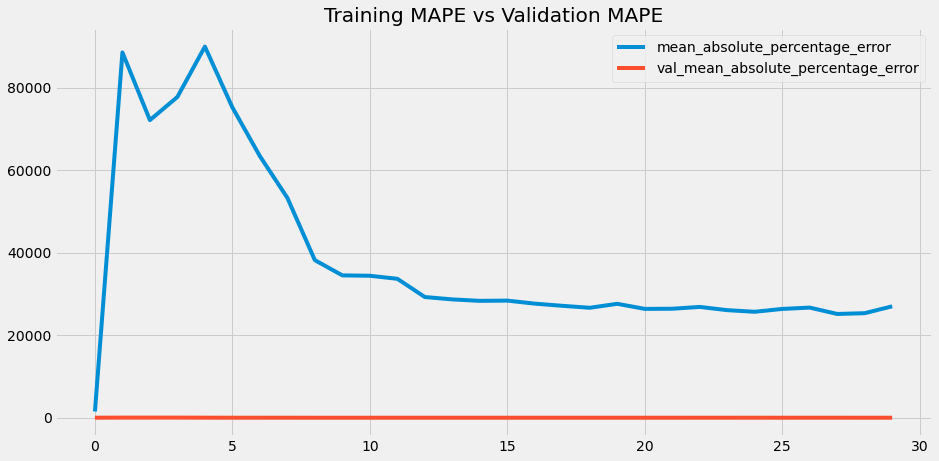

In [420]:
_ = training_results[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(title='Training MAPE vs Validation MAPE')

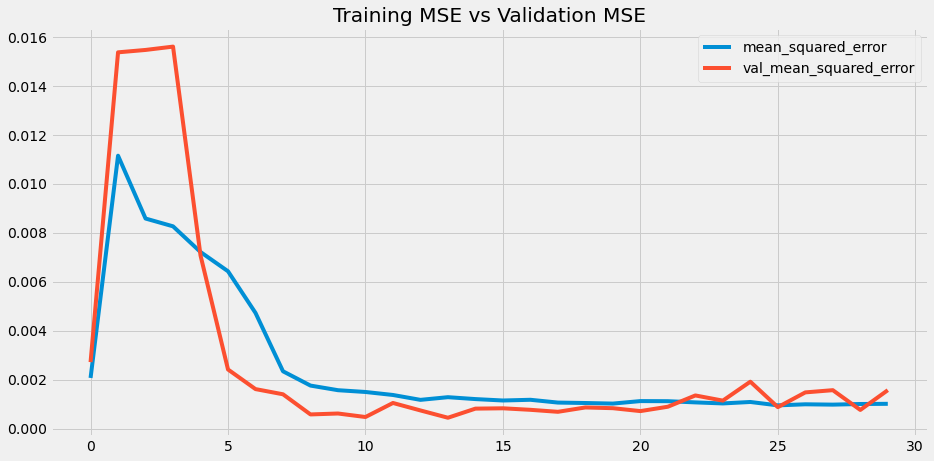

In [421]:
_ = training_results[['mean_squared_error', 'val_mean_squared_error']].plot(title='Training MSE vs Validation MSE')

<AxesSubplot:xlabel='date'>

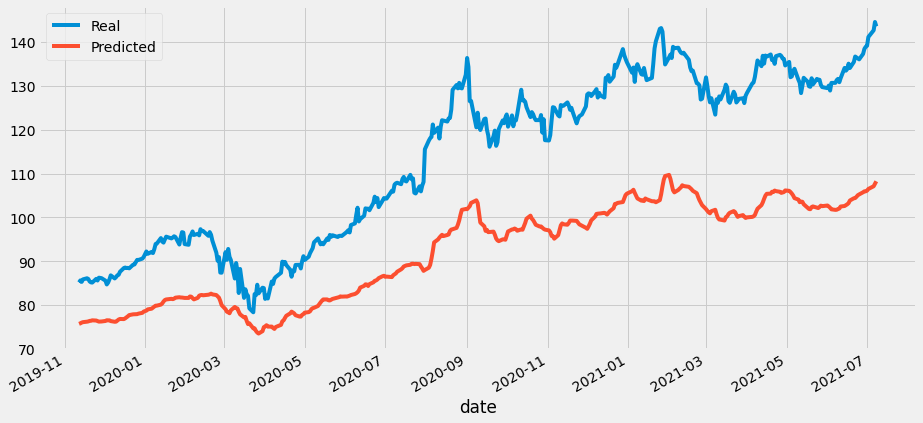

In [422]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": y_test.reshape(-1,1).ravel(),
    "Predicted": predicted.ravel()
    }, index = df_all['AAPL'].index[-len(y_test): ])


stocks.plot()